# **A. Perkenalan**

=================================================

Program ini diproduksi oleh PT. Bank ABC untuk segmentasi customer dalam aktivitas kartu kredit untuk keperluan personalized marketing.
Kegiatan ini dilakukan oleh program dengan membuat suatu model clustering bernama K-means. Model yang dibuat berdasarkan data customer kartu kredit  dari Januari 2024 hingga Juni 2024.

=================================================

## **1. Penjabaran masalah berdasarkan SMART framework**

Specific:
Meningkatkan kepuasan customer dengan memberikan penawaran yang relevan.

Measurable:
Nilai return on ad spend meningkat dari 2:1 menjadi 3:1.

Achievable:
Untuk mencari beberapa kebiasaan yang sering dilakukan oleh banyak customer, perlu dilakukan penyelidikan tentang customer-customer yang memiliki karakteristik yang sama dan mengelompokkannya menjadi satu kelompok. Hal ini dapat dilakukan dengan menggunakan model clustering. Selain itu, diasumsikan bahwa customer pada satu kelompok memiliki karakteristik yang berbeda dengan customer pada kelompok lainnya. Lalu, perlu dicari kondisi-kondisi apa yang menyebabkan customer-customer dalam satu kelompok bersifat unik. Terakhir, dibuat sebuah rekomendasi yang berkaitan dengan sifat unik tersebut.

Relevant:
Model clustering yang dibuat bisa mengelompokkan beberapa customer yang memiliki karakteristik yang sama. Kemudian, karakteristik customer dalam satu kelompok berbeda dengan customer dalam kelompok lainnya.

Time-bound:
Proyek ini perlu selesai dalam waktu 7 hari.

## **2. Penentuan jenis model machine learning**

Berdasarkan permasalahan yang dijelaskan pada poin A2, model machine learning yang perlu digunakan adalah model clustering dimana model yang nantinya akan digunakan bernama K-Means.

## **3. Latar Belakang**

Memahami aktivitas atau kebiasaan dari customer bisa menjadi kunci penting bagi perusahaan kartu kredit. Salah satu cara untuk melakukannya adalah dengan mencari beberapa aktivitas yang sering dilakukan oleh banyak customer. Banyaknya customer yang melakukan aktivitas yang sama bisa saja berasal dari faktor yang sama. Perusahaan perlu mempelajari faktor ini untuk meningkatkan kepuasan customer hingga menambah keuntungan perusahaan. Perusahaan dapat membuat penawaran atau marketing khusus yang relevan terhadap faktor ini.

## **4. Penjabaran Pemahaman Bisnis Seputar Masalah**

Berdasarkan apa yang dijelaskan sebelumnya, ketika fasilitas-fasilitas yang diberikan oleh perusahaan kartu kredit tidak relevan atau tidak sesuai dengan kebutuhan customer, kepercayaan customer akan kualitas perusahaan akan turun karena mereka menganggap kartu kredit yang mereka punya tidak bernilai. Lalu, mereka akan meninggalkan review negatif untuk perusahaan yang menyebabkan turunnya jumlah customer baru. Pada akhirnya, pendapatan perusahaan akan menurun.

# **B. Pemahaman data**

## **1. Penjabaran Jenis Data yang Diperlukan**

Berdasarkan permasalahan yang telah dijelaskan sebelumnya, dibutuhkan data yang berisikan informasi-informasi terkini dari aktivitas customer yang berkaitan dengan kartu kredit seperti, total nilai pemakaian, total nilai yang sudah dibayarkan, maupun lama waktu customer sudah menggunakan kartu kredit.

## **2. Import Libraries**

In [558]:
# memanggil Module

# Module pengolahan data
import pandas as pd
import numpy as np

# Module Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats

# Module Feature Engineering
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# Modul Model Saving
import json
import pickle

## **3. Query SQL**

Bagian ini bertujuan untuk pemilihan dan pengunduhan data dari Google BigQuery ke local.

Eksekusi dua script berikut pada Google BigQuery.

In [479]:

# # Set Up Module
# from google.colab import auth
# from google.cloud import bigquery
# from google.colab import files

# # Autentikasi
# auth.authenticate_user()
# print('Authenticated')

# # Mendefinisikan project_id dan client
# project_id = "mnuzulbandung"
# client = bigquery.Client(project=project_id)

# # Mengambil data dari tabel ftds-hacktiv8-project.phase1_ftds_021_hck.credit-card-information dan diubah menjadi dataframe df_1
# df_1 = client.query(
# '''
# SELECT*
# FROM `ftds-hacktiv8-project.phase1_ftds_021_hck.credit-card-information`
# WHERE MOD(CUST_ID, 2) = 1
# '''
# ).to_dataframe()

# df_1.to_csv('credit_card_info.csv', index=False)
# files.download('credit_card_info.csv')

## **4. Data Loading**

In [480]:
# Membaca data csv dan mengubahnya sebagai dataframe
df_1 = pd.read_csv('credit_card_info.csv', delimiter=',')

In [481]:
# Menampilkan 10 data awal
df_1.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [482]:
# Menampilkan 10 data akhir
df_1.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

## **5. Menjelaskan maksud dari masing-masing atribut**

Setiap baris data mengindikasi aktivitas customer yang berkaitan dengan kartu kredit.

Penjelasan dari atribut:
* CUST_ID: Identitas unik dari masing-masing customer
* BALANCE: Total nilai saldo yang perlu dibayarkan
* BALANCE_FREQUENCY: Rasion jumlah transaksi yang dilakukan
* PURCHASES: Total nilai saldo yang digunakan untuk pembelian
* ONEOFF_PURCHASES: Total nilai pembelian yang biasa dilakukan secara jarang dengan nilai yang biasanya relatif lebih besar dari biasanya
* INSTALLMENTS_PURCHASES: Total nilai pembelian yang dibayar dengan sistem cicilan
* CASH_ADVANCE: Total nilai pengambilan saldo dari ATM
* PURCHASES_FREQUENCY: Rasion jumlah transaksi yang dilakukan untuk pembelian
* ONEOFF_PURCHASES_FREQUENCY: Rasion jumlah transaksi yang dilakukan untuk pembelian yang biasa dilakukan secara jarang dengan nilai yang biasanya relatif lebih besar dari biasanya
* PURCHASES_INSTALLMENTS_FREQUENCY: Rasion jumlah transaksi yang dilakukan untuk pembelian yang dibayar dengan sistem cicilan
* CASH_ADVANCE_FREQUENCY: Rasion jumlah transaksi yang dilakukan untuk pengambilan saldo dari ATM
* CASH_ADVANCE_TRX: Jumlah transaksi yang dilakukan untuk pengambilan saldo dari ATM
* PURCHASES_TRX: Jumlah transaksi yang dilakukan untuk pembelian
* CREDIT_LIMIT: Nilai saldo maksimal yang bisa digunakan
* PAYMENTS: Total nilai saldo yang sudah dibayarkan
* MINIMUM_PAYMENTS: Nilai saldo terkecil yang perlu dibayarkan
* PRC_FULL_PAYMENT: Persentasi BALANCE yang sudah dibayar
* TENURE: Jangka waktu pembayaran kartu kredit

## **6. Mengetahui relevansi data dengan masalah yang dijabarkan.**

Berdasarkan poin B5, semua atribut berkaitan dengan permasalahan yang dijabarkan pada poin A karena memiliki beberapa informasi tentang aktivitas customer yang berkaitan dengan kartu kredit.

# **C. Data Cleaning**

## **1. Mengecek kesesuaian maksud atribut dengan tipe data**

In [483]:
# Memperlihatkan informasi general dari dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

## **2. Mengecek baris yang duplikat**

Data yang diambil dari sumber manapun bisa saja memiliki baris data yang duplikat. Hal ini terjadi karena adanya kesalahan pada input data. Kondisi ini mengakibatkan data tersebut tidak bisa dipakai untuk analisa regresi. Maka dari itu, kondisi ini perlu dicek.

In [484]:
# Memperlihatkan jumlah keseluruhan baris data
print('Jumlah baris untuk keseluruhan data adalah', df_1.shape[0])
# Memperlihatkan jumlah baris data yang dihapus duplikatnya
print('Jumlah baris ketika baris duplikat dihilangkan adalah', df_1.drop_duplicates().shape[0])
print('Terdapat', df_1.shape[0]-df_1.drop_duplicates().shape[0], 'baris yang terduplikat')

Jumlah baris untuk keseluruhan data adalah 4475
Jumlah baris ketika baris duplikat dihilangkan adalah 4475
Terdapat 0 baris yang terduplikat


Dari informasi di atas, tidak ada baris yang memiliki kesamaan pada semua nilai atribut dengan baris lain. Hal ini ditandai oleh tidak adanya perbedaan dari jumlah baris keseluruhan dan jumlah baris ketika baris duplikat dihilangkan.

## **3. Mengecek atribut CUST_ID yang duplikat**

Atribut CUST_ID dipakai sebagai ID dimana nilai atribut ini perlu unik di setiap baris yang dapat membedakan satu customer dengan yang lain. Maka dari itu, kondisi jumlah unik dari atribut ini perlu dicek.

In [485]:
# Memperlihatkan jumlah keseluruhan baris data
print('Jumlah baris untuk keseluruhan data adalah', df_1.shape[0])
# Memperlihatkan jumlah data unik pada atribut country yang dihapus duplikatnya
print('Jumlah data unik pada atribut country ketika data duplikat dihilangkan adalah', df_1['CUST_ID'].drop_duplicates().shape[0])

Jumlah baris untuk keseluruhan data adalah 4475
Jumlah data unik pada atribut country ketika data duplikat dihilangkan adalah 4475


Dari informasi di atas, tidak ada baris yang memiliki kesamaan pada nilai atribut CUST_ID dengan baris lain. Hal ini ditandai oleh tidak adanya perbedaan dari jumlah baris keseluruhan dan jumlah data unik pada atribut CUST_ID ketika data duplikat dihilangkan.

## **4. Mengecek cell dengan jumlah data lebih dari satu pada tipe data object**

Satu cell bisa saja memiliki data lebih dari satu dengan tipe data list atau dictionary. Hal ini terjadi karena adanya kesalahan pada proses input data. Maka dari itu, kondisi ini perlu dicek.

Untuk atribut numerik, jika semua cell berisi angka, maka tipe data akan berupa integer atau float. Namun, jika salah satu cell berisi list, maka tipe data bakan berubah menjadi object. Maka dari itu, atribut numerik tidak perlu dicek lebih lanjut karena sudah dilakukan di poin iii-c.

Untuk atribut kategorik, tipe data object dapat berarti semua cell berisi teks atau terdapat cell berisi list. Maka dari itu, atribut kategorik perlu dicek.

In [486]:
def f_konsistensi_tipe_data(dataframe):
    '''
    Fungsi ini bertujuan untuk mencari cell pada dataframe yang memiliki tipe data list, dictionary, dan list

    Input: dataframe
    OutputL: Informasi nama_kolom, indeks, nilai_cell, dan tipe_data yang bertipe list, dictionary, atau list

    '''
    # Membuat list kosong yang akan diisi dengan baris yang memiliki tipe data bukan string dan angka
    data = {
        'nama_kolom': [],
        'indeks': [],
        'nilai_cell' : [],
        'tipe_data' : [],
    }
    df_temp = pd.DataFrame(data)
    # Melakukan looping nama-nama kolom
    for column_name in dataframe:
        # Melakukan looping baris
        for row_index in range(dataframe.shape[0]):
            # Conditional untuk mencari baris yang memiliki tipe data bukan string dan angka
            cell = dataframe[column_name].iloc[row_index]
            if type(cell) not in [np.float64, np.int64, str]:
                # Mengisi baris yang memiliki tipe data bukan string dan angka ke dalam dataframe
                new_row = pd.DataFrame({'nama_kolom': [column_name],
                                        'indeks': [row_index],
                                        'nilai_cell': dataframe[column_name].iloc[row_index],
                                        'tipe_data': type(dataframe[column_name].iloc[row_index])})
                df_temp = pd.concat([df_temp, new_row], ignore_index=True)
    return df_temp

# Memanggil fungsi f_konsistensi_tipe_data untuk mengecek cell dengan jumlah data lebih dari satu pada tipe data object 
df_temp = f_konsistensi_tipe_data(df_1)
df_temp.head(5)


Empty DataFrame
Columns: [nama_kolom, indeks, nilai_cell, tipe_data]
Index: []

Dari informasi di atas, semua atribut memiliki nilai dengan tipe data yang sesuai dengan maksud atribut karena tidak memiliki tipe data yang bukan float, integer, dan string.

# **D. Exploratory Data Analysis (EDA)**

## **1. Tipe dan dimensi data**

Terdapat beberapa model clustering yang hanya berfokus pada data numerik saja atau data kategorik saja. Kemudian, ada pula beberapa model clustering yang hanya berfokus pada data dengan dimensi rendah atau tinggi. Penggunaan model clustering pada data dengan kondisi tipe atribut dan dimensi yang tidak sesuai dapat mengakibatkan gagalnya proses clustering. Maka dari itu, kondisi ini perlu dicek.

In [487]:
# Memperlihatkan dimensi data
df_1.shape

(4475, 18)

In [488]:
# Memperlihatkan info general data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Berdasarkan informasi di atas,
* Semua atribut bertipe numerik.
* Lalu atribut CUST_ID yang merupakan sebuah ID customer juga bertipe numerik. Karena atribut ini bertindak sebagai ID maka tidak dimasukkan ke dalam model clustering.
* Data ini memiliki dimensi (4475, 18) yang termasuk pada dimensi rendah dimana jumlah atributnya masih lebih kecil dari jumlah baris data.

## **2. Distribusi Data**

Distribusi data yang tidak seimbang adalah kondisi dimana tidak terdapat banyak data pada nilai tertentu dibandingkan nilai lainnya. Kondisi ini juga dapat membuat densitas dari data berbeda-beda. Namun, terdapat model clustering yang sensitif terhadap densitas data yang berbeda-beda. Melakukan clustering pada distribusi data yang tidak seimbang menggunakan model clustering yang mengasumsikan kondisi densitas data yang sama dapat mengakibatkan hasil clustering yang tidak bagus. Data poin yang ada di densitas rendah bisa saja tidak terepresentasikan dibandingkan data poin yang ada di densitas tinggi. Maka dari itu, kondisi ini perlu dicek.

In [489]:
def f_stat_numerik(dataframe):
    data = {
        'nama_kolom': [],
        'mean': [],
        'median' : [],
        'mode': [],
        'skewness' : [],
        'kurtosis' : [],
        'shapiro_wilk_test_p_value' : [],
        'normality': []
    }
    df_temp = pd.DataFrame(data)
    for column_name in dataframe:
        if dataframe[column_name].dtype != 'O':
            p_value = stats.shapiro(dataframe[column_name])[1].round(5)
            if p_value<0.05: normality = 'non-normal'
            else: normality = 'normal'
            new_row = pd.DataFrame({'nama_kolom': [column_name],
                                    'mean': [dataframe[column_name].mean()],
                                    'median': [dataframe[column_name].median()],
                                    'mode': [dataframe[column_name].mode().values[0]],
                                    'skewness': [dataframe[column_name].skew()],
                                    'kurtosis': [dataframe[column_name].kurtosis()],
                                    'shapiro_wilk_test_p_value': [p_value],
                                    'normality': [normality]
                                    })
            df_temp = pd.concat([df_temp, new_row], ignore_index=True)
    return df_temp

df_temp = df_1.drop(columns=['CUST_ID'])
df_temp = f_stat_numerik(df_temp)
df_temp

nama_kolom         mean       median         mode  \
0                            BALANCE  1563.205717   871.355430     0.000000   
1                  BALANCE_FREQUENCY     0.876933     1.000000     1.000000   
2                          PURCHASES  1003.251343   360.000000     0.000000   
3                   ONEOFF_PURCHASES   596.369893    45.650000     0.000000   
4             INSTALLMENTS_PURCHASES   407.110215    88.620000     0.000000   
5                       CASH_ADVANCE   984.288554     0.000000     0.000000   
6                PURCHASES_FREQUENCY     0.490579     0.500000     1.000000   
7         ONEOFF_PURCHASES_FREQUENCY     0.202301     0.083333     0.000000   
8   PURCHASES_INSTALLMENTS_FREQUENCY     0.363886     0.166667     0.000000   
9             CASH_ADVANCE_FREQUENCY     0.136132     0.000000     0.000000   
10                  CASH_ADVANCE_TRX     3.301229     0.000000     0.000000   
11                     PURCHASES_TRX    14.929162     7.000000     0.000000   
12                      CREDIT_LIMIT  4494.878630  3000.000000  3000.000000   
13                          PAYMENTS  1740.075430   877.494612     0.000000   
14                  MINIMUM_PAYMENTS   873.976757   313.980229   299.351881   
15                  PRC_FULL_PAYMENT     0.150224     0.000000     0.000000   
16                            TENURE    11.518212    12.000000    12.000000   

     skewness    kurtosis  shapiro_wilk_test_p_value   normality  
0    2.329009    7.181574                        0.0  non-normal  
1   -2.026530    3.099104                        0.0  non-normal  
2    7.071706   85.129517                        0.0  non-normal  
3    9.951057  164.111661                        0.0  non-normal  
4    6.330630   65.335628                        0.0  non-normal  
5    5.638109   73.399145                        0.0  non-normal  
6    0.058755   -1.649169                        0.0  non-normal  
7    1.548319    1.198458                        0.0  non-normal  
8    0.508296   -1.403919                        0.0  non-normal  
9    1.834211    3.471840                        0.0  non-normal  
10   6.420104   76.017405                        0.0  non-normal  
11   4.747507   36.712384                        0.0  non-normal  
12   1.498948    2.778728                        0.0  non-normal  
13   5.747503   54.764201                        0.0  non-normal  
14  14.669771  331.636648                        NaN      normal  
15   1.975238    2.577571                        0.0  non-normal  
16  -2.954159    7.811616                        0.0  non-normal

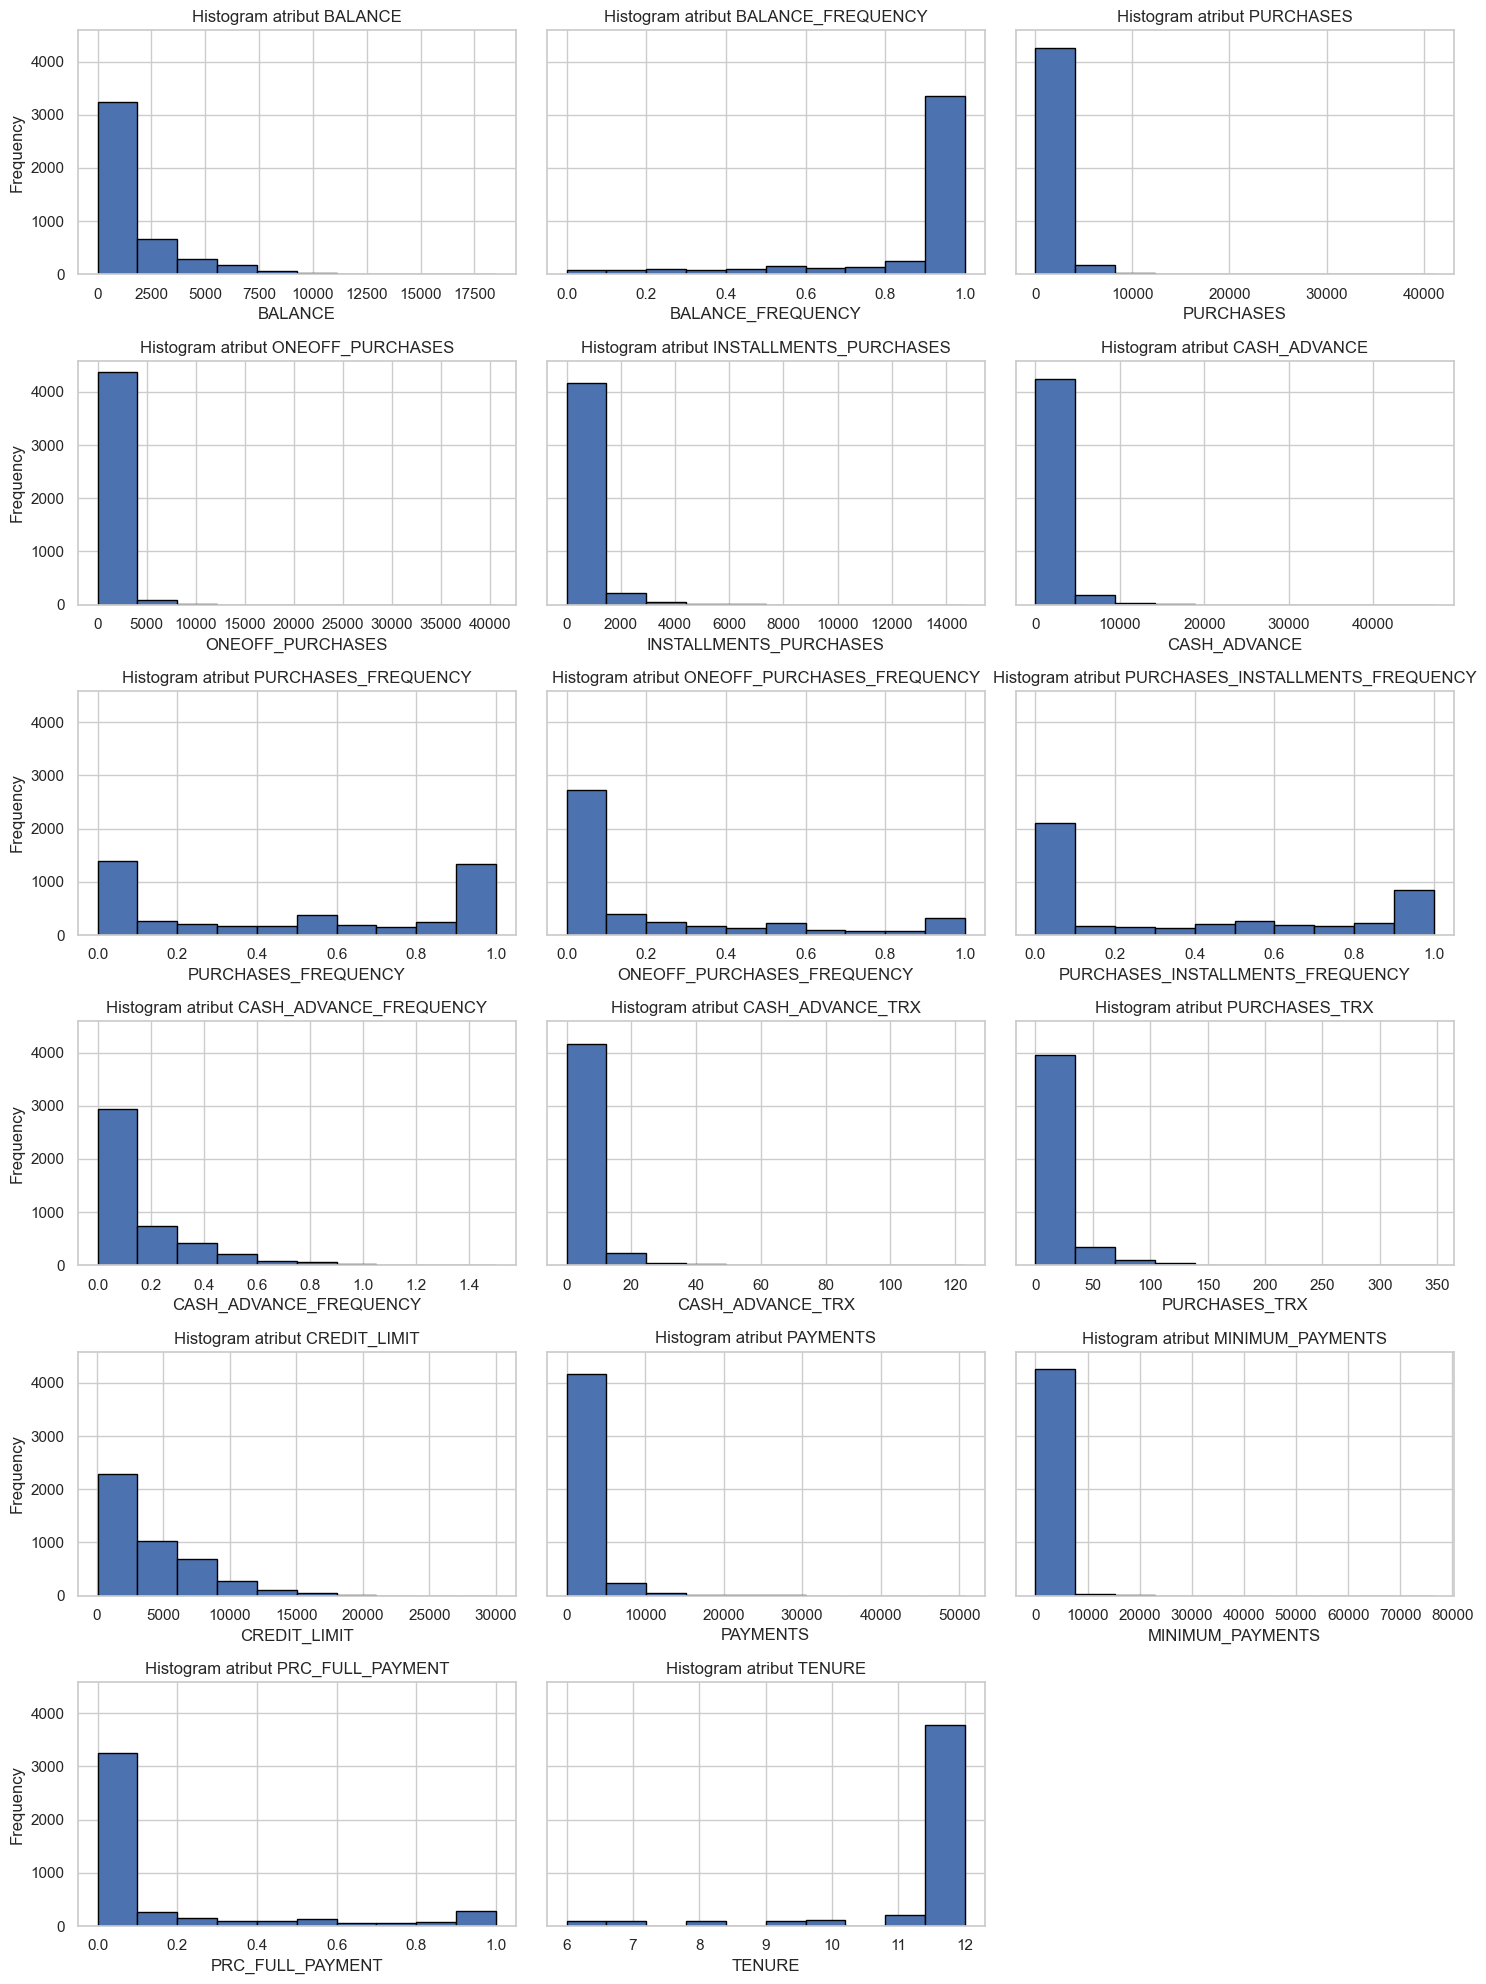

In [490]:
def f_histogram_numerik(dataframe, fig_per_row = 3, hor_size = 15, ver_size = 10):
    df_temp = dataframe.drop(columns=[i for i in dataframe if dataframe[i].dtype == 'O'])
    # Membuat dataframe yang berisi atribut numeric
    row = math.ceil(df_temp.shape[1]/fig_per_row)
    histogram = df_temp.hist(figsize=(hor_size, ver_size), bins=10, edgecolor='black', grid=True, sharey=True, layout=(row, fig_per_row))
    histogram = histogram.flatten()
    # Melakukan looping berdasarkan jumlah histogram
    for histogram_name, atribut in zip(histogram, df_temp.columns):
        histogram_name.set_title(f"Histogram atribut {atribut}") # Membuat judul histogram
        histogram_name.set_xlabel(atribut)  # Membuat label x-axis
        histogram_name.set_ylabel("Frequency") # Membuat label y-axis

    for j in range(len(df_temp.columns), len(histogram)):
        histogram[j].set_visible(False)

    return histogram

df_temp = df_1.drop(columns=['CUST_ID'])
histogram = f_histogram_numerik(df_temp, fig_per_row = 3, hor_size = 15, ver_size = 20)
plt.tight_layout()
plt.show()

Dari informasi dan visual di atas,
* Semua atribut numerik memiliki distribusi data yang tidak normal karena memiliki p_value dari tes shapiro_wilk_test di bawah 0.05.
* Terdapat beberapa atribut yang memiliki positive skewness karena memiliki nilai skewness di atas nilai 0.5, dimana kebanyakan data berpusat di sebelah kiri, antara lain:
    * BALANCE
    * PURCHASES
    * ONEOFF_PURCHASES
    * INSTALLMENTS_PURCHASES
    * CASH_ADVANCE
    * ONEOFF_PURCHASES_FREQUENCY
    * CASH_ADVANCE_FREQUENCY
    * CASH_ADVANCE_TRX
    * PURCHASES_TRX
    * CREDIT_LIMIT
    * PAYMENTS
    * MINIMUM_PAYMENTS
    * PRC_FULL_PAYMENT
* Terdapat beberapa atribut yang memiliki negative skewness karena memiliki nilai skewness di bawah nilai -0.5, dimana kebanyakan data berpusat di sebelah kanan, antara lain:
    * BALANCE_FREQUENCY
    * TENURE
* Terdapat beberapa atribut yang memiliki simetry skewness karena memiliki nilai skewness di antara nilai -0.5 dan 0.5, dimana data yang berpusat di sebelah kanan dan kiri berjumlah sama, antara lain:
    * PURCHASES_FREQUENCY
    * PURCHASES_INSTALLMENTS_FREQUENCY

Maka dari itu, kondisi ini perlu dijadikan bahan pertimbangan model clustering apa yang perlu dipakai.

## **3. Missing Values**

Data yang diambil dari sumber manapun bisa saja memiliki missing value dimana suatu feature pada baris tertentu tidak memiliki nilai apapun. Kondisi ini mengakibatkan data tersebut tidak bisa dipakai untuk clustering. Maka dari itu, kondisi ini perlu dicek.

Missing values bisa diketahui oleh dataframe secara langsung jika ditandai dengan None. Hal ini bisa berlaku untuk atribut berjenis categorical dan numeric.
Namun, ada pula missing value yang tidak bisa diketahui oleh dataframe secara langsung jika ditandai dengan angka 0 atau 999 (untuk atribut numeric) dan teks missing (untuk atribut categorical).

Kondisi missing values nantinya akan dicek ulang dan ditangani dalam proses FE.

### a. Mengecek missing values yang ditandai dengan None

In [491]:
# Memperlihatkan informasi general dari dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Dari informasi di atas, Atribut MINIMUM_PAYMENTS memiliki missing values karena memiliki jumlah data non-missing values 4320, sedangkan jumlah data keseluruhan adalah 4475. Maka dari itu, kondisi ini perlu ditangani.

### b. Mengecek missing values yang tidak ditandai dengan None pada atribut numerik

In [492]:
def f_min_max_numerik(dataframe):
    '''
    Fungsi ini bertujuan untuk membuat daftar nilai minimal dan maksimal untuk masing-masing atribut numerik

    Input: dataframe
    Output: Informasi nama_kolom, min, dan max yang dimiliki oleh masing-masing atribut numerik

    '''
    # Mempersiakpak dataframe kosong
    data = {'nama_kolom': [],
            'min': [],
            'max': []}
    df_temp = pd.DataFrame(data)
    # Membuat looping berdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter kolom yang memiliki data dengan tipe string
        if type(dataframe[column_name][0]) != str:
            # Membuat dataframe baru yang berisi nama_kolom, min, dan max
            new_row = pd.DataFrame({'nama_kolom': [column_name],
                                    'min': [dataframe[column_name].min()],
                                    'max': [dataframe[column_name].max()]})
            # Menggabungkan dataframe lama dan yang baru
            df_temp = pd.concat([df_temp, new_row])
        else: continue
    # Memberikan dataframe
    return df_temp

# Memanggil fungsi f_min_max_numerik untuk mengecek missing values yang tidak ditandai dengan None pada atribut numerik
df_temp = df_1.drop(columns=['CUST_ID'])
df_temp = f_min_max_numerik(df_temp)
df_temp

nama_kolom        min          max
0                           BALANCE   0.000000  18495.55855
0                 BALANCE_FREQUENCY   0.000000      1.00000
0                         PURCHASES   0.000000  41050.40000
0                  ONEOFF_PURCHASES   0.000000  40624.06000
0            INSTALLMENTS_PURCHASES   0.000000  14686.10000
0                      CASH_ADVANCE   0.000000  47137.21176
0               PURCHASES_FREQUENCY   0.000000      1.00000
0        ONEOFF_PURCHASES_FREQUENCY   0.000000      1.00000
0  PURCHASES_INSTALLMENTS_FREQUENCY   0.000000      1.00000
0            CASH_ADVANCE_FREQUENCY   0.000000      1.50000
0                  CASH_ADVANCE_TRX   0.000000    123.00000
0                     PURCHASES_TRX   0.000000    347.00000
0                      CREDIT_LIMIT  50.000000  30000.00000
0                          PAYMENTS   0.000000  50721.48336
0                  MINIMUM_PAYMENTS   0.019163  76406.20752
0                  PRC_FULL_PAYMENT   0.000000      1.00000
0                            TENURE   6.000000     12.00000

Dari tabel di atas,
* Semua atribut tidak memiliki nilai aneh seperti nilai negative atau 9999, sehingga mengindikasi tidak ada missing values pada atribut-atribut ini.

## **4. Outliers**

Data yang diambil dari sumber manapun bisa saja memiliki outlier dimana terdapat data dengan nilai yang sangat berbeda dengan yang lainnya. Namun, terdapat beberapa model clustering sensitif terhadap outlier. Melakukan clustering pada data dengan tingkat outlier tinggi menggunakan model clustering yang sensitif terhadap outlier dapat memperburuk hasil clustering. Bisa saja data outlier dimasukkan ke dalam kelompok walau karakteristiknya sangat berbeda dengan anggota kelompok lainnya. Maka dari itu, kondisi ini perlu dicek.

In [493]:
def f_outlier_numerik(dataframe):
    '''
    Fungsi ini bertujuan untuk menghitung outlier pada masing-masing atribut menggunakan z score atau tukey rule yang ditentukan oleh skewness dari data

    Input: dataframe
    Output: Informasi nama_kolom, skewness, tes, batas_atas, batas_bawah, jumlah_outlier, dan persentase_outlier yang dimiliki oleh dataframe

    '''
    # Mempersiapkan list kosong
    nama_kolom = []
    skewness = []
    tes = []
    batas_bawah = []
    batas_atas = []
    jumlah_outlier = []
    persentase_outlier = []

    # Membuat list berisi atribut bertipe non-object
    kolom_numeric = [i for i in dataframe if dataframe[i].dtype != 'O']

    # Looping nama kolom
    for column_name in kolom_numeric:
        # Menghitung nilai skewness
        skewness_value = dataframe[column_name].skew()
        # Menyimpan nilai skewness
        skewness.append(skewness_value)
        # Conditional jika skewness < 0.5 untuk melakukan tes z-score
        if abs(skewness_value) < 0.5:
            # Menyimpan jenis tes
            tes.append('z score')
            # Menghitung batas atas rentang z score
            atas = dataframe[column_name].mean() + 3*dataframe[column_name].std()
            # Menghitung batas bawah rentang z score
            bawah = dataframe[column_name].mean() - 3*dataframe[column_name].std()
        # Conditional jika skewness > 0.5 untuk melakukan tes Tukeys Rule
        else:
            # Menyimpan jenis tes
            tes.append('Tukeys Rule')
            # Menghitung nilai quartile 1 dari atribut Total_Amount
            quartil_1 = dataframe[column_name].quantile(0.25)
            # Menghitung nilai quartile 3 dari atribut Total_Amount
            quartil_3 = dataframe[column_name].quantile(0.75)
            # Menghitung nilai IQR dari atribut Total_Amount
            iqr = quartil_3-quartil_1
            # Menghitung batas atas rentang tukey's rule
            atas = quartil_3 + 1.5*iqr
            # Menghitung bawah atas rentang tukey's rule
            bawah = quartil_1 - 1.5*iqr
        # Kondisi data outlier
        kondisi_data_hanya_outlier = ((dataframe[column_name] > atas) | 
                                    (dataframe[column_name] < bawah))
        # Membuat dataframe yang berisikan baris dengan data outlier
        data_hanya_outlier = dataframe[kondisi_data_hanya_outlier]
        # Menghitung jumlah data outlier
        nama_kolom.append(column_name)
        jumlah_outlier.append(data_hanya_outlier.shape[0])
        persentasi_data_hanya_outlier = round((data_hanya_outlier.shape[0]/dataframe.shape[0]*100), 2)
        persentase_outlier.append(persentasi_data_hanya_outlier)
        batas_atas.append(atas)
        batas_bawah.append(bawah)

    # Membuat dataframe berdasarkan list
    data = {'nama_kolom': nama_kolom,
            'skewness': skewness,
            'tes': tes,
            'batas_atas': batas_atas,
            'batas_bawah': batas_bawah,
            'jumlah_outlier' : jumlah_outlier,
            'persentase_outlier': persentase_outlier}
    df_temp = pd.DataFrame(data)
    # Mengeluarkan dataframe
    return df_temp

# Memanggil fungsi f_outlier_numerik untuk mengecek outlier pada atribut numerik
df_temp = df_1.drop(columns=['CUST_ID'])
df_temp = f_outlier_numerik(df_temp)
df_temp


nama_kolom   skewness          tes    batas_atas  \
0                            BALANCE   2.329009  Tukeys Rule   4932.277724   
1                  BALANCE_FREQUENCY  -2.026530  Tukeys Rule      1.166666   
2                          PURCHASES   7.071706  Tukeys Rule   2696.710000   
3                   ONEOFF_PURCHASES   9.951057  Tukeys Rule   1438.050000   
4             INSTALLMENTS_PURCHASES   6.330630  Tukeys Rule   1139.712500   
5                       CASH_ADVANCE   5.638109  Tukeys Rule   2847.219385   
6                PURCHASES_FREQUENCY   0.058755      z score      1.699299   
7         ONEOFF_PURCHASES_FREQUENCY   1.548319  Tukeys Rule      0.625000   
8   PURCHASES_INSTALLMENTS_FREQUENCY   0.508296  Tukeys Rule      1.875000   
9             CASH_ADVANCE_FREQUENCY   1.834211  Tukeys Rule      0.625000   
10                  CASH_ADVANCE_TRX   6.420104  Tukeys Rule     10.000000   
11                     PURCHASES_TRX   4.747507  Tukeys Rule     41.000000   
12                      CREDIT_LIMIT   1.498948  Tukeys Rule  13850.000000   
13                          PAYMENTS   5.747503  Tukeys Rule   4213.621750   
14                  MINIMUM_PAYMENTS  14.669771  Tukeys Rule   1795.542484   
15                  PRC_FULL_PAYMENT   1.975238  Tukeys Rule      0.312500   
16                            TENURE  -2.954159  Tukeys Rule     12.000000   

    batas_bawah  jumlah_outlier  persentase_outlier  
0  -2760.274076             359                8.02  
1      0.722223             748               16.72  
2  -1554.730000             424                9.47  
3   -862.830000             523               11.69  
4   -683.827500             442                9.88  
5  -1708.331631             504               11.26  
6     -0.718141               0                0.00  
7     -0.375000             557               12.45  
8     -1.125000               0                0.00  
9     -0.375000             172                3.84  
10    -6.000000             402                8.98  
11   -23.000000             400                8.94  
12 -5750.000000             120                2.68  
13 -1925.112168             414                9.25  
14  -807.581260             441                9.85  
15    -0.187500             797               17.81  
16    12.000000             698               15.60

Berdasarkan informasi di atas,
* Hampir semua atribut memiliki beberapa data yang dianggap sebagai outlier dimana atribut yang memiliki data outlier terbesar adalah PRC_FULL_PAYMENT dengan persentase 17.81%. Kondisi ini perlu dicek ulang dan ditangani pada bagian FE.
* Terdapat dua atribut yang tidak memiliki outlier sama sekali, yaitu atribut PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY.

## **5. Hubungan antar atribut**

Dalam suatu data, terdapat beberapa atribut yang memiliki hubungan linier dengan atribut lain, atau bisa disebut dengan multikolinearitas. Namun, terdapat beberapa model clustering yang sensitif terhadap multikolinearitas. Melakukan clustering pada data dengan multikolinearitas menggunakan model clustering yang sensitif terhadap multikolinearitas dapat menghasilkan hasil clustering yang buruk. Bisa saja perhitungan jarak antar poin menjadi redundan dan clustering akan lebih terpengaruh oleh atribut dengan multikolinearitas. Maka dari itu, kondisi ini perlu dicek.

Mengecek hubungan antar atribut numerik . Berdasarkan poin D-2, semua atribut memiliki nilai dengan distribusi yang tidak normal. Maka dari itu, untuk perhitungan hubungan atribut numerik menggunakan perhitungan korelasi spearman

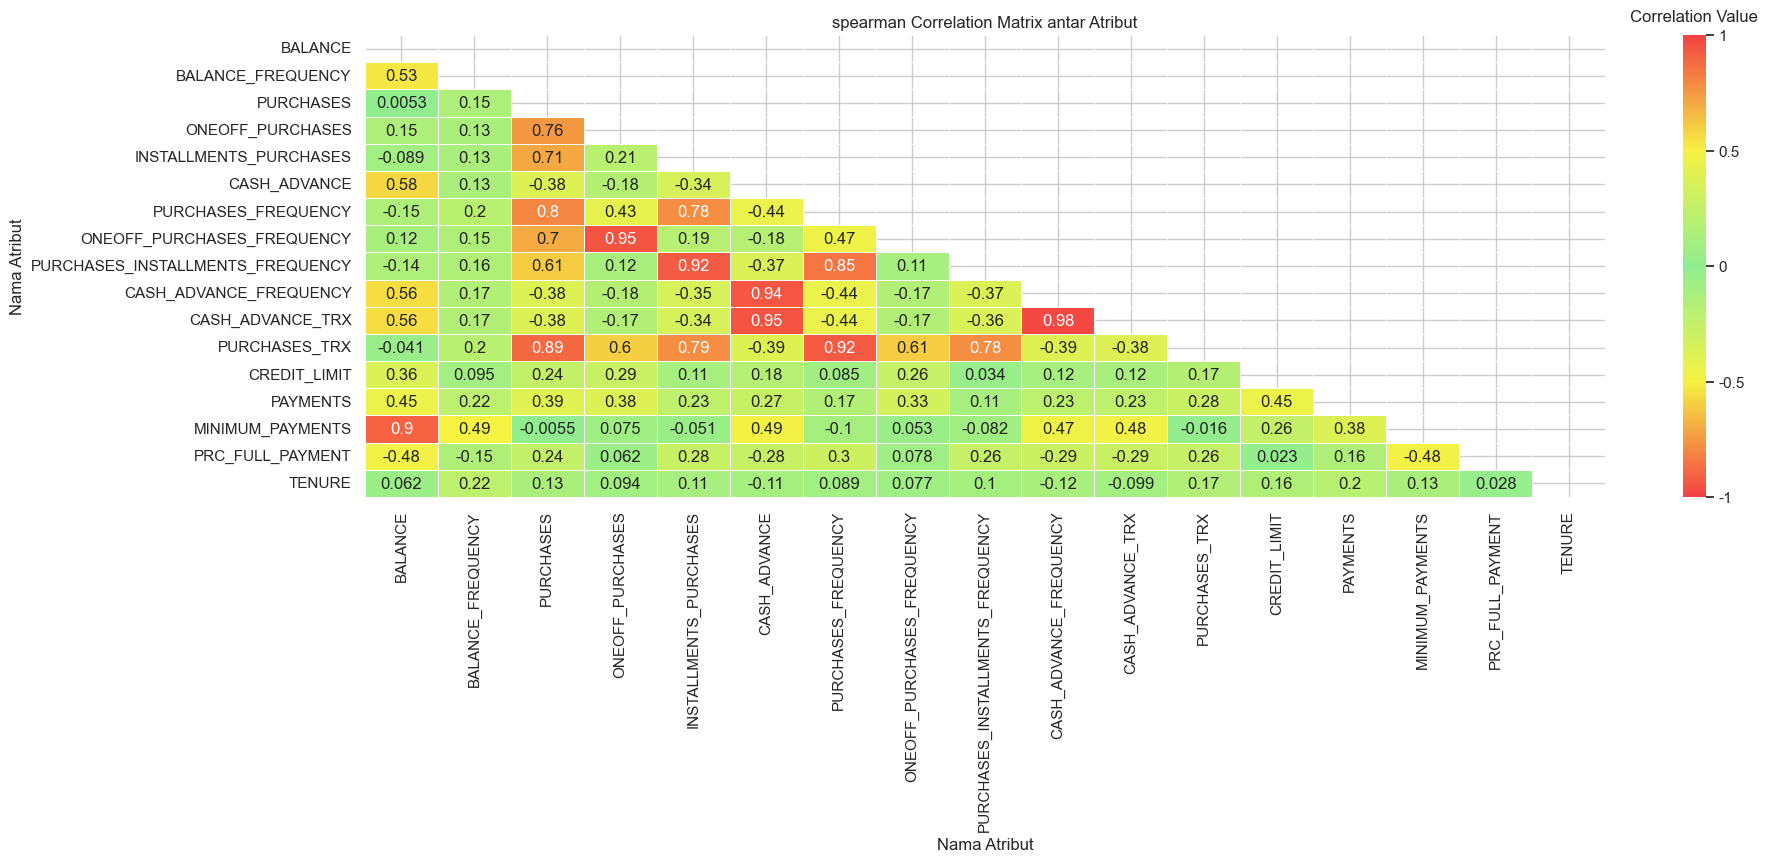

In [494]:
def f_hubungan_atribut_numerik(dataframe, method, horsize = 20, versize = 6):
    spearman_corr = dataframe.corr(method=method)
    red_green_cmap = LinearSegmentedColormap.from_list('red_green_red', ['#f54242', '#f5f242', '#90ee90', '#f5f242', '#f54242'])

    mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

    plt.figure(figsize=(horsize, versize))
    heatmap = sns.heatmap(spearman_corr,
                annot=True,
                cmap=red_green_cmap,
                linewidths=0.5,
                mask=mask,
                vmin=-1,
                vmax=1,
                cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1]})
    
    colorbar = heatmap.collections[0].colorbar
    colorbar.ax.set_yticklabels(['-1', '-0.5', '0', '0.5', '1'])
    colorbar.ax.set_title('Correlation Value', pad=10)
    
    plt.xlabel('Nama Atribut', fontsize=12)
    plt.ylabel('Nama Atribut', fontsize=12)
    plt.title(f'{method} Correlation Matrix antar Atribut')
    plt.show()

df_temp = df_1.drop(columns=['CUST_ID'])
f_hubungan_atribut_numerik(df_temp, 'spearman')

Berdasarkan visual di atas,

Terdapat beberapa atribut yang saling berkorelasi satu sama lain, yaitu:
* MINIMUM_PAYMENTS dan BALANCE
* ONEOFF_PURCHASES_FREQUENCY dan ONEOFF_PURCHASES
* PURCHASES_INSTALLMENTS_FREQUENCY dan INSTALLMENTS_PURCHASES
* PURCHASES, PURCHASES_FREQUENCY, dan PURCHASES_TRX
* CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, dan CASH_ADVANCE_TRX

Maka dari itu, kondisi ini perlu dicek pada pagian FE.

## **6. Mengetahui Pengaruh atribut TENURE dengan atribut PURCHASES, BALANCE, dan PAYMENTS**

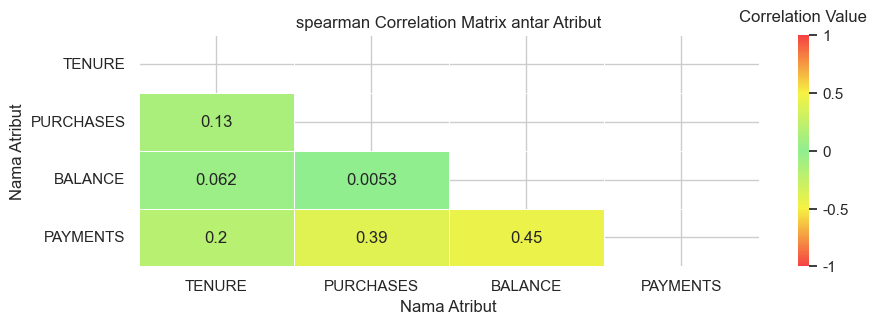

In [495]:
df_temp = df_1[['TENURE', 'PURCHASES', 'BALANCE', 'PAYMENTS']]
f_hubungan_atribut_numerik(df_temp, 'spearman', horsize = 10, versize = 3)

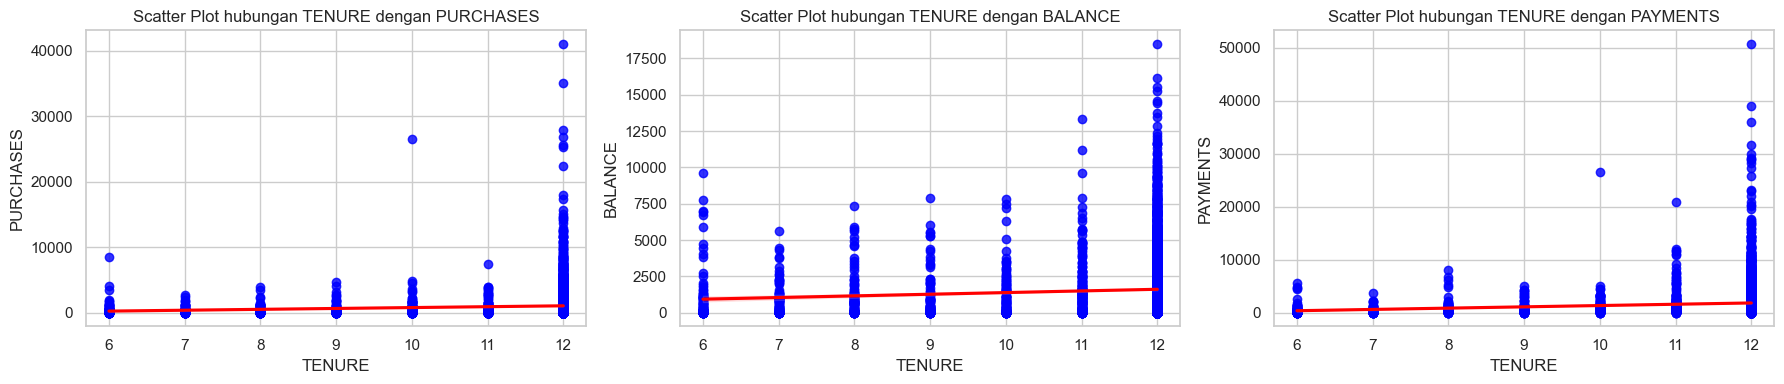

In [496]:
def f_scatterplot_korelasi_numerik(dataframe, target, horsize = 18, versize = 6):
    # Membuat list berisi atribut bertipe non-object
    column_names = [i for i in dataframe if dataframe[i].dtype != 'O' and i != target]
    # Membuat scatter plot
    if len(column_names) != 1:
        fig, axes = plt.subplots(1, len(column_names), figsize=(horsize, versize))
    else:
        fig, axes = plt.subplots(1, 1, figsize=(horsize, versize))

    # Mengatur scatter plot
    for index, column_name in enumerate(column_names):
        sns.regplot(x=target, y=column_name, data=dataframe, ax=axes[index] if len(column_names) != 1 else axes, color='blue', marker='o', line_kws={"color":"red"})
        axes[index].set_title(f'Scatter Plot hubungan {target} dengan {column_name}') if len(column_names) != 1 else axes.set_title(f'Scatter Plot hubungan {target} dengan {column_name}')
        axes[index].set_xlabel(target) if len(column_names) != 1 else axes.set_xlabel(target)
        axes[index].set_ylabel(column_name) if len(column_names) != 1 else axes.set_ylabel(column_name)

    return fig, axes

df_temp = df_1[['TENURE', 'PURCHASES', 'BALANCE', 'PAYMENTS']]
fig, axes = f_scatterplot_korelasi_numerik(df_temp, 'TENURE', horsize = 18, versize = 4)
plt.tight_layout()
plt.show()

Hasil analisis:
* Pada visual pertama, uji korelasi atribut PURCHASES, BALANCE, dan PAYMENTS terhadap atribut TENURE memiliki hasil nilai di bawah 0.5 dan di atas 0.
* Pada visual kedua, persebaran scatterplot atribut PURCHASES, BALANCE, dan PAYMENTS terhadap atribut TENURE memiliki garis merah dengan sudut yang hampir horizontal. 
* Dapat disimpulkan bahwa nilai dari atribut TENURE tidak memiliki pengaruh yang signifikan terhadap nilai pada atribut PURCHASES, BALANCE, dan PAYMENTS.

## **7. Mengetahui Pengaruh atribut CREDIT_LIMIT dengan atribut PURCHASES_FREQUENCY**

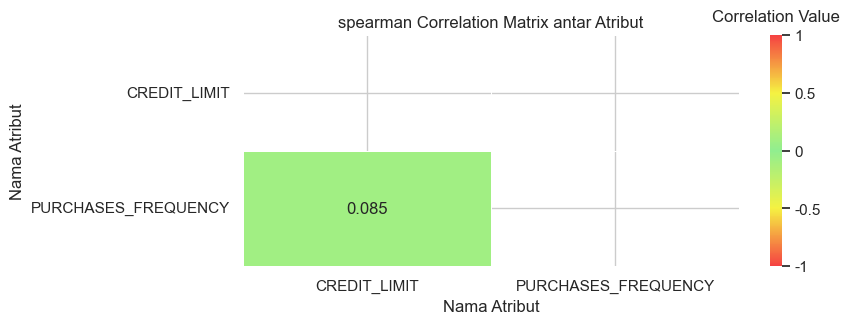

In [497]:
df_temp = df_1[['CREDIT_LIMIT', 'PURCHASES_FREQUENCY']]
f_hubungan_atribut_numerik(df_temp, 'spearman', horsize = 8, versize = 3)

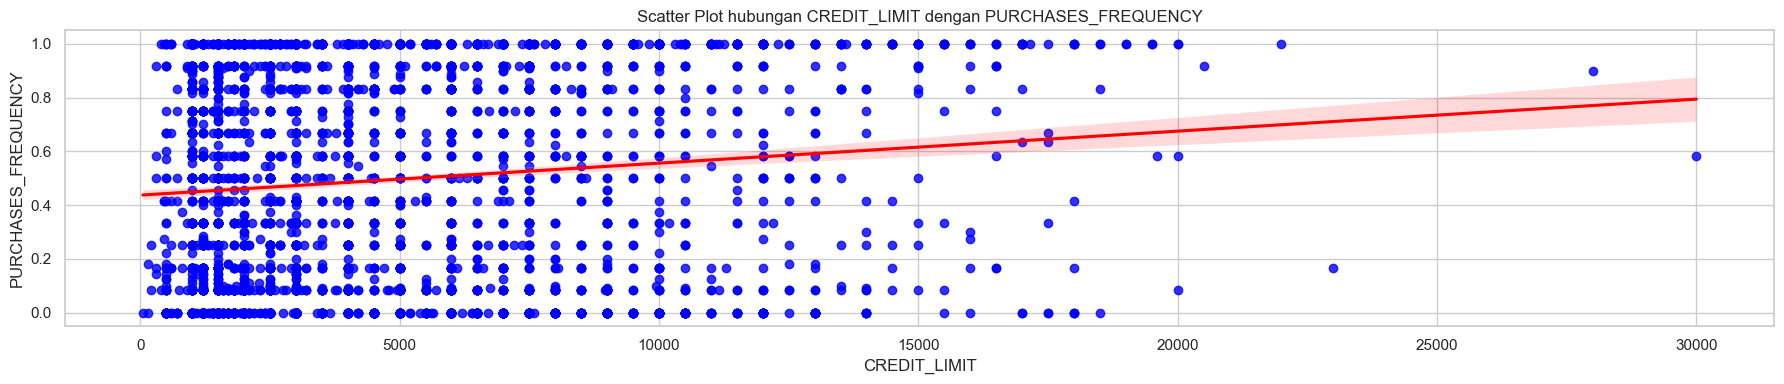

In [498]:
df_temp = df_1[['CREDIT_LIMIT', 'PURCHASES_FREQUENCY']]
fig, axes = f_scatterplot_korelasi_numerik(df_temp, 'CREDIT_LIMIT', horsize = 18, versize = 4)
plt.tight_layout()
plt.show()

Hasil analisis:
* Pada visual pertama, uji korelasi atribut PURCHASES_FREQUENCY terhadap atribut CREDIT_LIMIT memiliki hasil nilai di bawah 0.1 dan di atas 0.
* Pada visual kedua, persebaran scatterplot atribut PURCHASES_FREQUENCY terhadap atribut CREDIT_LIMIT memiliki garis merah dengan sudut yang hampir horizontal. 
* Dapat disimpulkan bahwa nilai dari atribut CREDIT_LIMIT tidak memiliki pengaruh yang signifikan terhadap nilai pada atribut PURCHASES_FREQUENCY.
* Maka dari itu, nasabah dengan CREDIT_LIMIT yang tinggi belum tentu sering melakukan pembelian, dimana terdapat beberapa nasabah dengan CREDIT_LIMIT yang tinggi yang sering melakukan pembelian maupun yang jarang melakukan pembelian. Lalu, begitu pula nasabah dengan CREDIT_LIMIT yang rendah, terdapat beberapa nasabah dengan CREDIT_LIMIT yang rendah yang sering melakukan pembelian maupun yang jarang melakukan pembelian.

## **8. Rentang nilai data**

Dalam suatu data, terdapat beberapa atribut dengan rentang nilai yang berbeda-beda karena memiliki konteks yang berbeda pula. Namun, terdapat beberapa model clustering yang sensitif terhadap rentang nilai yang berbeda-beda ini. Melakukan clustering pada data dengan rentang nilai yang berbeda-beda menggunakan model clustering yang tidak sesuai dapat menghasilkan hasil clustering yang buruk. Bisa saja perhitungan jarak antar poin akan didominasi oleh atribut dengan nilai yang besar. Maka dari itu, kondisi ini perlu dicek.

In [499]:
def f_min_max_numerik(dataframe):
    data = {'nama_kolom': [],
            'min': [],
            'max': []}
    df_temp = pd.DataFrame(data)
    # Membuat looping berdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter kolom yang memiliki data dengan tipe string
        if type(dataframe[column_name][0]) != str:
            # Membuat dataframe baru yang berisi nama_kolom, min, dan max
            new_row = pd.DataFrame({'nama_kolom': [column_name],
                                    'min': [dataframe[column_name].min()],
                                    'max': [dataframe[column_name].max()]})
            # Menggabungkan dataframe lama dan yang baru
            df_temp = pd.concat([df_temp, new_row])
        else: continue
    return df_temp

df_temp = df_1.drop(columns=['CUST_ID'])
df_temp = f_min_max_numerik(df_temp)
df_temp

nama_kolom        min          max
0                           BALANCE   0.000000  18495.55855
0                 BALANCE_FREQUENCY   0.000000      1.00000
0                         PURCHASES   0.000000  41050.40000
0                  ONEOFF_PURCHASES   0.000000  40624.06000
0            INSTALLMENTS_PURCHASES   0.000000  14686.10000
0                      CASH_ADVANCE   0.000000  47137.21176
0               PURCHASES_FREQUENCY   0.000000      1.00000
0        ONEOFF_PURCHASES_FREQUENCY   0.000000      1.00000
0  PURCHASES_INSTALLMENTS_FREQUENCY   0.000000      1.00000
0            CASH_ADVANCE_FREQUENCY   0.000000      1.50000
0                  CASH_ADVANCE_TRX   0.000000    123.00000
0                     PURCHASES_TRX   0.000000    347.00000
0                      CREDIT_LIMIT  50.000000  30000.00000
0                          PAYMENTS   0.000000  50721.48336
0                  MINIMUM_PAYMENTS   0.019163  76406.20752
0                  PRC_FULL_PAYMENT   0.000000      1.00000
0                            TENURE   6.000000     12.00000

Dari informasi di atas,
* Rentang nilai dari masing-masing atribut adalah berbeda.
* Terdapat beberapa atribut yang memiliki rentang yang sama, yakni dari 0.0 hingga 1.0, antara lain:
    * BALANCE_FREQUENCY
    * PURCHASES_FREQUENCY
    * ONEOFF_PURCHASES_FREQUENCY
    * PURCHASES_INSTALLMENTS_FREQUENCY
    * CASH_ADVANCE_FREQUENCY
    * PRC_FULL_PAYMENT
Maka dari itu, kondisi ini perlu ditangani pada bagian FE.

In [500]:

table_names = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']
num_of_unique_data = []
unique_data = []

for table_name in table_names:
    num_of_unique_data.append(df_1[table_name].nunique()) # Mengisi list dengan jumlah data unik
    unique_data.append(sorted(df_1[table_name].unique().round(2).tolist())) # Mengisi list daftar data unik jika jumlahnya kurang dari 17
data = {'table_name': table_names,
        'num': num_of_unique_data,
        'unique_data': unique_data}
pd.set_option('display.max_colwidth', None) # Mengatur lebar tabel yang akan divisualisasikan
df = pd.DataFrame(data)
df

table_name  num  \
0                 BALANCE_FREQUENCY   43   
1               PURCHASES_FREQUENCY   46   
2        ONEOFF_PURCHASES_FREQUENCY   45   
3  PURCHASES_INSTALLMENTS_FREQUENCY   47   
4            CASH_ADVANCE_FREQUENCY   51   
5                  PRC_FULL_PAYMENT   47   

                                                                                                                                                                                                                                                                                             unique_data  
0                                                [0.0, 0.09, 0.1, 0.11, 0.12, 0.14, 0.17, 0.18, 0.2, 0.22, 0.25, 0.27, 0.29, 0.3, 0.33, 0.36, 0.38, 0.4, 0.43, 0.44, 0.45, 0.5, 0.55, 0.56, 0.57, 0.6, 0.62, 0.64, 0.67, 0.7, 0.71, 0.73, 0.75, 0.78, 0.8, 0.82, 0.83, 0.86, 0.88, 0.89, 0.9, 0.91, 1.0]  
1                              [0.0, 0.08, 0.09, 0.1, 0.11, 0.12, 0.14, 0.17, 0.18, 0.2, 0.22, 0.25, 0.27, 0.29, 0.3, 0.33, 0.36, 0.38, 0.4, 0.42, 0.43, 0.45, 0.5, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.64, 0.67, 0.7, 0.71, 0.73, 0.75, 0.78, 0.8, 0.82, 0.83, 0.86, 0.88, 0.89, 0.9, 0.91, 0.92, 1.0]  
2                                    [0.0, 0.08, 0.09, 0.1, 0.11, 0.12, 0.14, 0.17, 0.18, 0.2, 0.22, 0.25, 0.27, 0.29, 0.3, 0.33, 0.36, 0.38, 0.4, 0.42, 0.43, 0.44, 0.45, 0.5, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.64, 0.67, 0.7, 0.71, 0.73, 0.75, 0.78, 0.8, 0.82, 0.83, 0.88, 0.9, 0.91, 0.92, 1.0]  
3                        [0.0, 0.08, 0.09, 0.1, 0.11, 0.12, 0.14, 0.17, 0.18, 0.2, 0.22, 0.25, 0.27, 0.29, 0.3, 0.33, 0.36, 0.38, 0.4, 0.42, 0.43, 0.44, 0.45, 0.5, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.64, 0.67, 0.7, 0.71, 0.73, 0.75, 0.78, 0.8, 0.82, 0.83, 0.86, 0.88, 0.89, 0.9, 0.91, 0.92, 1.0]  
4  [0.0, 0.08, 0.09, 0.1, 0.11, 0.12, 0.14, 0.17, 0.18, 0.2, 0.22, 0.25, 0.27, 0.29, 0.3, 0.33, 0.36, 0.38, 0.4, 0.42, 0.43, 0.44, 0.45, 0.5, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.64, 0.67, 0.7, 0.71, 0.73, 0.75, 0.78, 0.8, 0.82, 0.83, 0.86, 0.88, 0.9, 0.92, 1.0, 1.09, 1.1, 1.12, 1.14, 1.25, 1.5]  
5                        [0.0, 0.08, 0.09, 0.1, 0.11, 0.12, 0.14, 0.17, 0.18, 0.2, 0.22, 0.25, 0.27, 0.29, 0.3, 0.33, 0.36, 0.38, 0.4, 0.42, 0.43, 0.44, 0.45, 0.5, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.64, 0.67, 0.7, 0.71, 0.73, 0.75, 0.78, 0.8, 0.82, 0.83, 0.86, 0.88, 0.89, 0.9, 0.91, 0.92, 1.0]

Dari tabel di atas, 
* Beberapa atribut yang memiliki rentang dari 0.0 hingga 1.0 seperti di bawah ini, memiliki data unik yang hampir sama. Dapat diasumsikan bahwa atribut-atribut ini memiliki nilai yang sudah ditranformasikan menggunakan scaling.
    * BALANCE_FREQUENCY
    * PURCHASES_FREQUENCY
    * ONEOFF_PURCHASES_FREQUENCY
    * PURCHASES_INSTALLMENTS_FREQUENCY
    * CASH_ADVANCE_FREQUENCY
    * PRC_FULL_PAYMENT

## **9. Kesimpulan EDA**

# **E. Feature Engineering**

## **1. Feature Selection**

**Menghilangkan atribut ID untuk clustering**

Berdasarkan hasil poin D, terdapat atribut CUST_ID yang bertindak sebagai ID data. Jika atribut ini dimasukkan ke dalam clustering, atribut ini tidak memiliki pola tertentu yang akan merendahkan hasil clustering. Maka dari itu, atribut ini perlu dihilangkan. Bagian ini bertujuan untuk menghapus atribut tersebut.

In [501]:
df_2 = df_1.copy()
df_2 = df_2.drop(columns=['CUST_ID'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

Berdasarkan informasi di atas, atribut CUST_ID berhasil terhapus.

In [502]:
df_3 = df_2.copy()

## **2. Outliers**

Berdasarkan hasil poin F, terdapat outlier pada data. Bagian ini bertujuan untuk menangani kondisi ini.

### a. Mengecek keberadaan outlier

In [503]:
df_temp = f_outlier_numerik(df_3)
df_temp

nama_kolom   skewness          tes    batas_atas  \
0                            BALANCE   2.329009  Tukeys Rule   4932.277724   
1                  BALANCE_FREQUENCY  -2.026530  Tukeys Rule      1.166666   
2                          PURCHASES   7.071706  Tukeys Rule   2696.710000   
3                   ONEOFF_PURCHASES   9.951057  Tukeys Rule   1438.050000   
4             INSTALLMENTS_PURCHASES   6.330630  Tukeys Rule   1139.712500   
5                       CASH_ADVANCE   5.638109  Tukeys Rule   2847.219385   
6                PURCHASES_FREQUENCY   0.058755      z score      1.699299   
7         ONEOFF_PURCHASES_FREQUENCY   1.548319  Tukeys Rule      0.625000   
8   PURCHASES_INSTALLMENTS_FREQUENCY   0.508296  Tukeys Rule      1.875000   
9             CASH_ADVANCE_FREQUENCY   1.834211  Tukeys Rule      0.625000   
10                  CASH_ADVANCE_TRX   6.420104  Tukeys Rule     10.000000   
11                     PURCHASES_TRX   4.747507  Tukeys Rule     41.000000   
12                      CREDIT_LIMIT   1.498948  Tukeys Rule  13850.000000   
13                          PAYMENTS   5.747503  Tukeys Rule   4213.621750   
14                  MINIMUM_PAYMENTS  14.669771  Tukeys Rule   1795.542484   
15                  PRC_FULL_PAYMENT   1.975238  Tukeys Rule      0.312500   
16                            TENURE  -2.954159  Tukeys Rule     12.000000   

    batas_bawah  jumlah_outlier  persentase_outlier  
0  -2760.274076             359                8.02  
1      0.722223             748               16.72  
2  -1554.730000             424                9.47  
3   -862.830000             523               11.69  
4   -683.827500             442                9.88  
5  -1708.331631             504               11.26  
6     -0.718141               0                0.00  
7     -0.375000             557               12.45  
8     -1.125000               0                0.00  
9     -0.375000             172                3.84  
10    -6.000000             402                8.98  
11   -23.000000             400                8.94  
12 -5750.000000             120                2.68  
13 -1925.112168             414                9.25  
14  -807.581260             441                9.85  
15    -0.187500             797               17.81  
16    12.000000             698               15.60

Berdasarkan informasi di atas,
* Hampir semua atribut memiliki beberapa data yang dianggap sebagai outlier dimana atribut yang memiliki data outlier terbesar adalah PRC_FULL_PAYMENT dengan persentase 17.81%. Kondisi ini perlu dicek ulang dan ditangani pada bagian FE.
* Terdapat dua atribut yang tidak memiliki outlier sama sekali, yaitu atribut PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY.

### b. Penanganan outlier

Outlier memiliki definisi data dengan nilai berbeda dengan yang lainnya. Namun, bukan berarti nilai yang berbeda ini merupakan hasil dari ketidak sengajaan. Dikarenakan data yang digunakan bersifat sensitif yang berhubungan dengan uang, maka penanganan data outlier tidak dilakukan.

## **3. Missing Values**

Berdasarkan hasil EDA, Terdapat satu atribut yang memiliki missing values, MINIMUM_PAYMENTS yang ditandai oleh None. Bagian ini bertujuan untuk menangani kondisi ini.

### a. Menghitung jumlah baris dengan missing values beserta persentasenya

In [504]:
# menghitung jumlah baris dengan data missing values
jumlah_missing_values = df_3[(df_3['MINIMUM_PAYMENTS'].isnull())].count().max()
# menghitung persentase baris dengan data missing values
persentase_missing_values = round(jumlah_missing_values/(df_3.shape[0])*100, 2)

print(f'Jumlah baris yang memiliki missing values pada data adalah {jumlah_missing_values} dengan persentase {persentase_missing_values} %')

Jumlah baris yang memiliki missing values pada data adalah 155 dengan persentase 3.46 %


Berdasarkan informasi di atas jumlah baris yang memiliki missing values pada data adalah 155 dengan persentase 3.46 %

### b. Identifikasi jenis missing values

Bagian ini bertujuan untuk mengecek hubungan missing values pada atribut ini dengan atribut lain.

In [505]:
# Mengcopy dataframe temporary
df_temp_missing_values = df_3.copy()
# Membuat atribut baru yang berisikan informasi posisi data missing values
df_temp_missing_values['MINIMUM_PAYMENTS_mv'] = df_temp_missing_values['MINIMUM_PAYMENTS'].apply(lambda x: 'MISSING' if pd.isnull(x) else 'NOT-MISSING')
df_temp_missing_values = df_temp_missing_values.drop(columns=['MINIMUM_PAYMENTS'])
# Memperlihatkan data
df_temp_missing_values.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    3.833185              0.125      45.00             45.00   
1    0.000000              0.000     176.03            176.03   
2  757.964752              0.875     157.40            157.40   
3  264.566591              0.375    1150.00           1150.00   
4  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  PRC_FULL_PAYMENT  TENURE MINIMUM_PAYMENTS_mv  
0     0.000000               0.0       8             MISSING  
1     0.000000               0.0       8             MISSING  
2  1494.480376               0.0       8         NOT-MISSING  
3  3029.380326               0.0       8         NOT-MISSING  
4   215.316424               0.0       8         NOT-MISSING

In [506]:
def f_hubungan_atr_num_tar_kat(dataframe, target):
    '''
    # Fungsi ini bertujuan untuk menjelaskan hubungan atribut kategorik dengan target feature continuous. Hubungan dijelaskan dengan menggunakan tes Independent Samples t-test, One-Way ANOVA test, atau Kruskal Wallis test.

    # Input: dataframe, target feature
    # Output: Informasi nama_kolom_1, jumlah_data_unik_kolom_1, target_feature, normality_target_feature, jenis tes, p_value,
    # rata_rata_target yang dimiliki oleh dataframe

    '''
    # Mempersiapkan list kosong yang nantinya akan diisi oleh informasi korelasi
    nama_atribut = []
    jumlah_data_unik_target = []
    normality_atribut = []
    jenis_tes = []
    p_value = []
    # Melakukan looping berdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter atribut bertipe string
        if dataframe[column_name].dtype != 'O':
            # Memasukkan nama atribut ke dalam list
            nama_atribut.append(column_name)
            # Menfilter atribut yang memiliki unik data kurang dari tiga
            data_unik = len(dataframe[target].unique())
            jumlah_data_unik_target.append(data_unik)
            if data_unik < 3:
                normality_atribut.append('tidak_perlu_dihitung')
                # Memasukkan jenis tes yang digunakan ke dalam list
                jenis_tes.append('Independent Samples t-test')
                # Melakukan tes dan memasukkan hasilnya ke dalam list
                p_value_t_test = stats.ttest_ind(dataframe[dataframe[target] == dataframe[target].unique()[0]][column_name],
                                                dataframe[dataframe[target] == dataframe[target].unique()[1]][column_name])[1]
                p_value.append(p_value_t_test)
            else:
                # Menghitung normality atribut target
                p_value_shapiro = stats.shapiro(dataframe[column_name])[1]
                # Mengelompokkan data atribut target berdasarkan unik data
                kelompok_data = [kelompok[column_name].values for i, kelompok in dataframe.groupby(target)]
                # Conditional jika atribut target normal
                if p_value_shapiro>0.05:
                    normality_atribut.append('normal')
                    # Memasukkan jenis tes yang digunakan ke dalam list
                    jenis_tes.append('One-Way ANOVA')
                    # Melakukan tes dan memasukkan hasilnya ke dalam list
                    p_value_anova = stats.f_oneway(*kelompok_data)[1]
                    p_value.append(p_value_anova)
                else:
                    normality_atribut.append('non-normal')
                    # Memasukkan jenis tes yang digunakan ke dalam list
                    jenis_tes.append('Kruskal Wallis test')
                    # Melakukan tes dan memasukkan hasilnya ke dalam list
                    p_value_kruskal = stats.kruskal(*kelompok_data)[1]
                    p_value.append(p_value_kruskal)
        else: continue

    # Membuat dataframe berdasarkan list
    data = {'nama_atribut': nama_atribut,
            'nama_target': [target]*len(nama_atribut),
            'jumlah_data_unik_target': jumlah_data_unik_target,
            'normality_atribut': normality_atribut,
            'jenis_tes': jenis_tes,
            'p_value': [round(i, 3) for i in p_value]        
            }
    df_temp = pd.DataFrame(data)
    # Membuat atribut baru berdasarkan apakah ada perbedaan atau tidak
    df_temp['analisa_p_value'] = df_temp['p_value'].apply(lambda x: 'rata-rata atribut berbeda di antara kelompok target'
                                              if x < 0.05 else 'rata-rata atribut tidak berbeda di antara kelompok target')
    df_temp['keterangan'] = df_temp['p_value'].apply(lambda x: 'atribut dan target memiliki hubungan'
                                              if x < 0.05 else 'atribut dan target tidak ada hubungan')
    return df_temp

# Memanggil fungsi f_hubungan_kategorik mengecek hubungan atribut kategorik dengan target
df_temp = f_hubungan_atr_num_tar_kat(df_temp_missing_values, 'MINIMUM_PAYMENTS_mv')
# Memperlihatkan data
df_temp.drop(columns=['jumlah_data_unik_target', 'normality_atribut'])

nama_atribut          nama_target  \
0                            BALANCE  MINIMUM_PAYMENTS_mv   
1                  BALANCE_FREQUENCY  MINIMUM_PAYMENTS_mv   
2                          PURCHASES  MINIMUM_PAYMENTS_mv   
3                   ONEOFF_PURCHASES  MINIMUM_PAYMENTS_mv   
4             INSTALLMENTS_PURCHASES  MINIMUM_PAYMENTS_mv   
5                       CASH_ADVANCE  MINIMUM_PAYMENTS_mv   
6                PURCHASES_FREQUENCY  MINIMUM_PAYMENTS_mv   
7         ONEOFF_PURCHASES_FREQUENCY  MINIMUM_PAYMENTS_mv   
8   PURCHASES_INSTALLMENTS_FREQUENCY  MINIMUM_PAYMENTS_mv   
9             CASH_ADVANCE_FREQUENCY  MINIMUM_PAYMENTS_mv   
10                  CASH_ADVANCE_TRX  MINIMUM_PAYMENTS_mv   
11                     PURCHASES_TRX  MINIMUM_PAYMENTS_mv   
12                      CREDIT_LIMIT  MINIMUM_PAYMENTS_mv   
13                          PAYMENTS  MINIMUM_PAYMENTS_mv   
14                  PRC_FULL_PAYMENT  MINIMUM_PAYMENTS_mv   
15                            TENURE  MINIMUM_PAYMENTS_mv   

                     jenis_tes  p_value  \
0   Independent Samples t-test    0.000   
1   Independent Samples t-test    0.000   
2   Independent Samples t-test    0.000   
3   Independent Samples t-test    0.007   
4   Independent Samples t-test    0.000   
5   Independent Samples t-test    0.003   
6   Independent Samples t-test    0.000   
7   Independent Samples t-test    0.000   
8   Independent Samples t-test    0.000   
9   Independent Samples t-test    0.000   
10  Independent Samples t-test    0.000   
11  Independent Samples t-test    0.000   
12  Independent Samples t-test    0.015   
13  Independent Samples t-test    0.000   
14  Independent Samples t-test    0.000   
15  Independent Samples t-test    0.000   

                                        analisa_p_value  \
0   rata-rata atribut berbeda di antara kelompok target   
1   rata-rata atribut berbeda di antara kelompok target   
2   rata-rata atribut berbeda di antara kelompok target   
3   rata-rata atribut berbeda di antara kelompok target   
4   rata-rata atribut berbeda di antara kelompok target   
5   rata-rata atribut berbeda di antara kelompok target   
6   rata-rata atribut berbeda di antara kelompok target   
7   rata-rata atribut berbeda di antara kelompok target   
8   rata-rata atribut berbeda di antara kelompok target   
9   rata-rata atribut berbeda di antara kelompok target   
10  rata-rata atribut berbeda di antara kelompok target   
11  rata-rata atribut berbeda di antara kelompok target   
12  rata-rata atribut berbeda di antara kelompok target   
13  rata-rata atribut berbeda di antara kelompok target   
14  rata-rata atribut berbeda di antara kelompok target   
15  rata-rata atribut berbeda di antara kelompok target   

                              keterangan  
0   atribut dan target memiliki hubungan  
1   atribut dan target memiliki hubungan  
2   atribut dan target memiliki hubungan  
3   atribut dan target memiliki hubungan  
4   atribut dan target memiliki hubungan  
5   atribut dan target memiliki hubungan  
6   atribut dan target memiliki hubungan  
7   atribut dan target memiliki hubungan  
8   atribut dan target memiliki hubungan  
9   atribut dan target memiliki hubungan  
10  atribut dan target memiliki hubungan  
11  atribut dan target memiliki hubungan  
12  atribut dan target memiliki hubungan  
13  atribut dan target memiliki hubungan  
14  atribut dan target memiliki hubungan  
15  atribut dan target memiliki hubungan

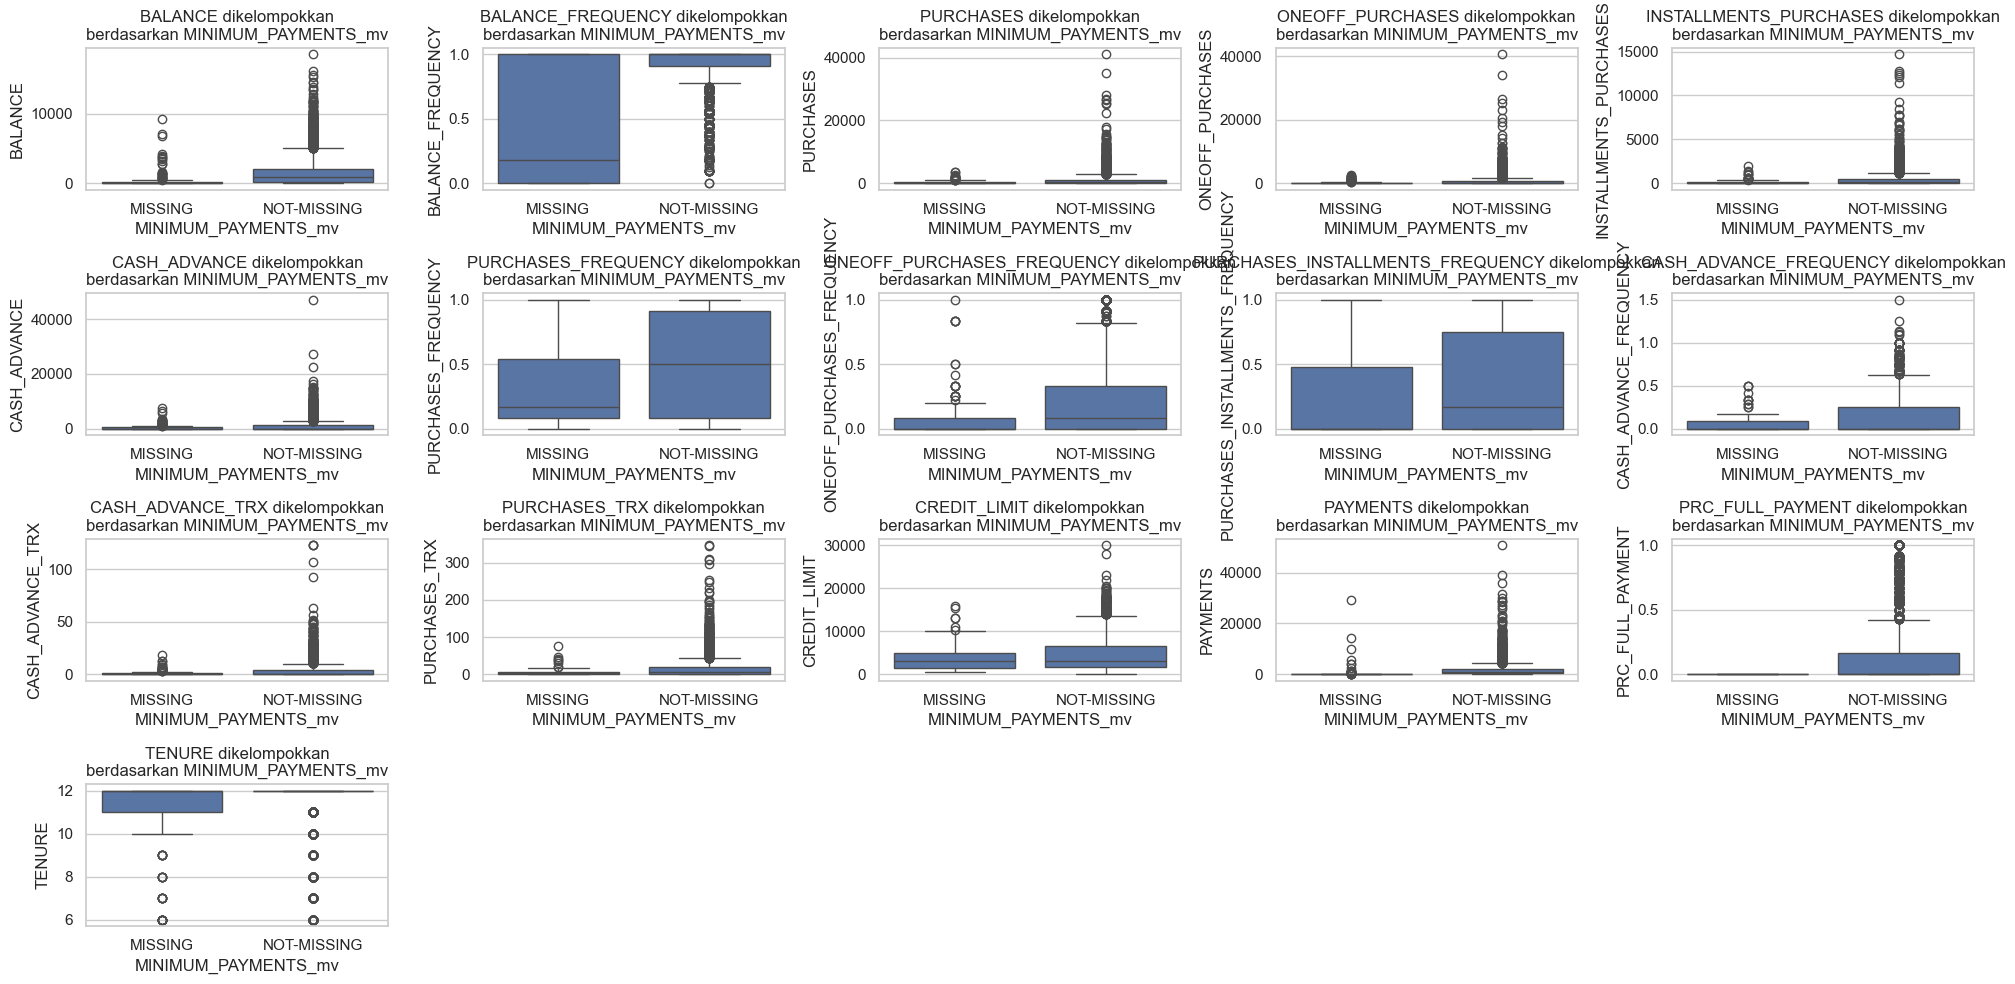

In [507]:
def f_boxplot_hubungan_atr_num_tar_kat(dataframe, target, fig_per_row = 3, hor_size = 20, ver_size = 10):
    # Membuat list berisi atribut bertipe object
    column_names = [i for i in dataframe if dataframe[i].dtype != 'O']

    # Membuat box plot
    row = math.ceil(len(column_names)/fig_per_row)
    fig, axes = plt.subplots(row, fig_per_row, figsize=(hor_size, ver_size))
    axes = axes.flatten()

    # Mengatur box plot
    for index, column_name in enumerate(column_names):
        sns.boxplot(x=target, y=column_name, data=dataframe, ax=axes[index])
        axes[index].set_title(f'{column_name} dikelompokkan\nberdasarkan {target}')
        axes[index].set_xlabel(target)
        axes[index].set_ylabel(column_name)
    
    for i in range(len(column_names), len(axes)):
        fig.delaxes(axes[i])

    return fig, axes

fig, ax = f_boxplot_hubungan_atr_num_tar_kat(df_temp_missing_values, 'MINIMUM_PAYMENTS_mv', fig_per_row = 5, hor_size = 20, ver_size = 10)
plt.tight_layout()
plt.show()

Berdasarkan tabel di atas, Ketika nilai dari atribut MINIMUM_PAYMENTS tidak ada atau memiliki missing values, kondisi ini memiliki hubungan dengan nilai dari atribut lain.

### c. Handling Missing Values atribut MINIMUM_PAYMENTS

Jenis handling yang akan dilakukan pada missing values atribut MINIMUM_PAYMENTS adalah Imputation Median dengan alasan:
1. Jenis missing values berupa Missing at Random (MAR).
2. Data yang digunakan bersifat sensitif.
3. Atribut MINIMUM_PAYMENTS merupakan atribut numerik.
4. Atribut MINIMUM_PAYMENTS memiliki distribusi data yang tidak normal.

In [508]:
def f_angka_setelah_koma(angka):
    if '.' in str(angka):
        return len(str(angka).split('.')[1])
    else: return 0

def f_pembulatan(n, decimals=0):
    return math.ceil(n * (10 ** decimals)) / (10 ** decimals)

def f_handling_missing_values_imputation_numerik(dataframe, column_names):
    df_temp = dataframe.copy()
    
    df_normality = f_stat_numerik(dataframe.dropna())
    
    for column_name in column_names:
        normality = df_normality[df_normality['nama_kolom']==column_name]['normality'].values[0]
        if normality =='normal':
            nilai_pengganti = dataframe[column_name].mean()
        else: # untuk data yang tidak normal
            nilai_pengganti = dataframe[column_name].median()
            
        nilai_pengganti = f_pembulatan(nilai_pengganti, f_angka_setelah_koma(dataframe[column_name].iloc[300]))

        df_temp.loc[(df_temp[column_name].isnull()), column_name] = nilai_pengganti

    return df_temp

df_4 = f_handling_missing_values_imputation_numerik(df_3, ['MINIMUM_PAYMENTS'])
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

In [509]:
print('Nilai median untuk atribut MINIMUM_PAYMENTS SEBELUM missing values di-handling adalah', df_3['MINIMUM_PAYMENTS'].median())
print('Nilai median untuk atribut MINIMUM_PAYMENTS SESUDAH missing values di-handling adalah', df_4['MINIMUM_PAYMENTS'].median())

Nilai median untuk atribut MINIMUM_PAYMENTS SEBELUM missing values di-handling adalah 313.980229
Nilai median untuk atribut MINIMUM_PAYMENTS SESUDAH missing values di-handling adalah 313.980229


Berdasarkan informasi di atas, atribut MINIMUM_PAYMENTS memiliki jumlah data non-missing values 4475, sama dengan jumlah baris data keseluruhan (4475). Lalu, nilai median untuk atribut MINIMUM_PAYMENTS sebelum dan sesudah missing values di-handling adalah sama (313.980229). Maka dari itu, proses penanganan missing values telah berhasil. 

## **4. Scaling**

Berdasarkan hasil poin E, rentang nilai dari beberapa atribut berbeda. Bagian ini bertujuan untuk menangani kondisi ini.

Untuk menentukan teknik scaling, perlu diketahui kondisi distribusi data untuk masing-masing atribut.

In [510]:
df_temp = f_stat_numerik(df_4)
df_temp

nama_kolom         mean       median         mode  \
0                            BALANCE  1563.205717   871.355430     0.000000   
1                  BALANCE_FREQUENCY     0.876933     1.000000     1.000000   
2                          PURCHASES  1003.251343   360.000000     0.000000   
3                   ONEOFF_PURCHASES   596.369893    45.650000     0.000000   
4             INSTALLMENTS_PURCHASES   407.110215    88.620000     0.000000   
5                       CASH_ADVANCE   984.288554     0.000000     0.000000   
6                PURCHASES_FREQUENCY     0.490579     0.500000     1.000000   
7         ONEOFF_PURCHASES_FREQUENCY     0.202301     0.083333     0.000000   
8   PURCHASES_INSTALLMENTS_FREQUENCY     0.363886     0.166667     0.000000   
9             CASH_ADVANCE_FREQUENCY     0.136132     0.000000     0.000000   
10                  CASH_ADVANCE_TRX     3.301229     0.000000     0.000000   
11                     PURCHASES_TRX    14.929162     7.000000     0.000000   
12                      CREDIT_LIMIT  4494.878630  3000.000000  3000.000000   
13                          PAYMENTS  1740.075430   877.494612     0.000000   
14                  MINIMUM_PAYMENTS   854.580229   313.980229   313.980229   
15                  PRC_FULL_PAYMENT     0.150224     0.000000     0.000000   
16                            TENURE    11.518212    12.000000    12.000000   

     skewness    kurtosis  shapiro_wilk_test_p_value   normality  
0    2.329009    7.181574                        0.0  non-normal  
1   -2.026530    3.099104                        0.0  non-normal  
2    7.071706   85.129517                        0.0  non-normal  
3    9.951057  164.111661                        0.0  non-normal  
4    6.330630   65.335628                        0.0  non-normal  
5    5.638109   73.399145                        0.0  non-normal  
6    0.058755   -1.649169                        0.0  non-normal  
7    1.548319    1.198458                        0.0  non-normal  
8    0.508296   -1.403919                        0.0  non-normal  
9    1.834211    3.471840                        0.0  non-normal  
10   6.420104   76.017405                        0.0  non-normal  
11   4.747507   36.712384                        0.0  non-normal  
12   1.498948    2.778728                        0.0  non-normal  
13   5.747503   54.764201                        0.0  non-normal  
14  14.913415  342.847612                        0.0  non-normal  
15   1.975238    2.577571                        0.0  non-normal  
16  -2.954159    7.811616                        0.0  non-normal

Scaling yang digunakan adalah robust scaler karena:
* Berdasarkan hasil poin E-2, terdapat banyak nilai ekstrim yang tidak ditangani.
* Berdasarkan hasil sebelumnya, terdapat banyak atribut yang memiliki nilai yang tidak normal.

In [511]:
# Memanggil jenis scaler
scaler = RobustScaler()

# Mendefinisikan parameter transformasi scaler
scaler.fit(df_4)

# Mengubah data ke dalam bentuk scaling
arr_5 = scaler.transform(df_4)

# Mengembalikan data ke dalam bentuk dataframe
df_5 = pd.DataFrame(arr_5, columns=df_4.columns)

In [512]:
df_temp = f_min_max_numerik(df_5)
df_temp

nama_kolom       min         max
0                           BALANCE -0.453090    9.164295
0                 BALANCE_FREQUENCY -9.000009    0.000000
0                         PURCHASES -0.338709   38.283876
0                  ONEOFF_PURCHASES -0.079361   70.544157
0            INSTALLMENTS_PURCHASES -0.194391   32.020093
0                      CASH_ADVANCE  0.000000   41.388813
0               PURCHASES_FREQUENCY -0.600000    0.600000
0        ONEOFF_PURCHASES_FREQUENCY -0.333332    3.666668
0  PURCHASES_INSTALLMENTS_FREQUENCY -0.222223    1.111111
0            CASH_ADVANCE_FREQUENCY  0.000000    6.000000
0                  CASH_ADVANCE_TRX  0.000000   30.750000
0                     PURCHASES_TRX -0.437500   21.250000
0                      CREDIT_LIMIT -0.602041    5.510204
0                          PAYMENTS -0.571776   32.478351
0                  MINIMUM_PAYMENTS -0.510094  123.627512
0                  PRC_FULL_PAYMENT  0.000000    8.000000
0                            TENURE -6.000000    0.000000

Berdasarkan informasi di atas, semua atribut memiliki rentang nilai yang lebih baik dibandingkan sebelumnya. Namun, dapat dilihat bahwa terdapat beberapa atribut yang masih memiliki nilai maksimal yang sangat berbeda dengan yang lainnya akibat dari tingginya nilai dan jumlah outlier, seperti pada atribut MINIMUM_PAYMENTS dan ONEOFF_PURCHASES.

## **5. Dimensionality Reduction**

Berdasarkan hasil poin D, terdapat beberapa feature yang saling berkorelasi. Untuk mengatasi kondisi ini perlu dilakukan adanya penurunan dimensi data atau dimensionality reduction. Proses ini bertujuan untuk menggabungkan dua feature yang saling berkorelasi menjadi satu feature sehingga tidak memiliki informasi yang redundan dan tidak menghilangkan informasi unik dari kedua feature tersebut.

### a. Mengecek keberadaan atribut yang saling berkorelasi

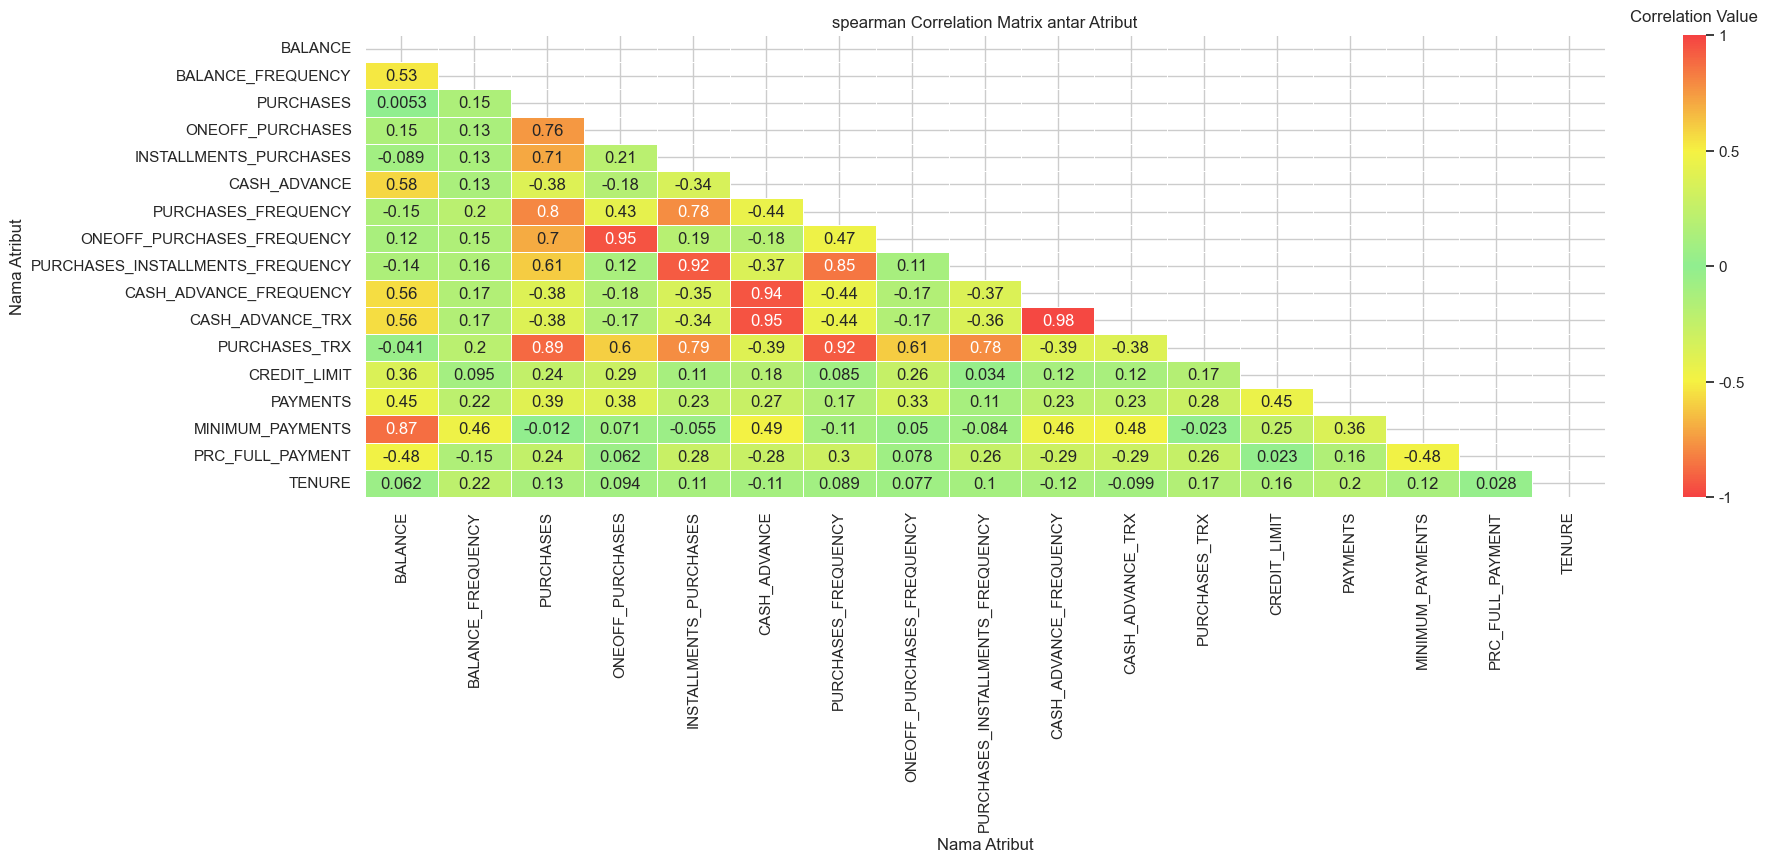

In [513]:
f_hubungan_atribut_numerik(df_5, 'spearman')

### b. Melakukan dimensionality reduction

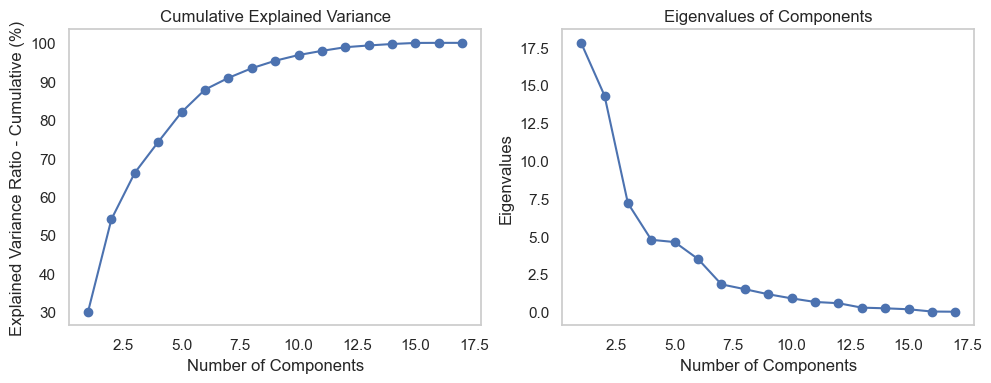

Berdasarkan model PCA yang telah dibuat, untuk mempertahankan 95.00% informasi pada data, jumlah atribut yang perlu digunakan adalah 9


In [514]:
def f_pca_model_graph(array, explained_var_percentage):
    # Check if the input array is a valid 2D array
    if len(array.shape) != 2:
        raise ValueError("Input array must be 2-dimensional")

    # Initialize and fit PCA
    pca = PCA()
    pca.fit(array)

    fig, axs = plt.subplots(1, 2, figsize=[10, 4])

    axs[0].plot(range(1, array.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_ * 100), marker='o')
    axs[0].grid()
    axs[0].set_xlabel('Number of Components')
    axs[0].set_ylabel('Explained Variance Ratio - Cumulative (%)')
    axs[0].set_title('Cumulative Explained Variance')

    axs[1].plot(range(1, array.shape[1] + 1), pca.explained_variance_, marker='o')
    axs[1].grid()
    axs[1].set_xlabel('Number of Components')
    axs[1].set_ylabel('Eigenvalues')
    axs[1].set_title('Eigenvalues of Components')

    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

    cumsum = np.cumsum(pca.explained_variance_ratio_)
    num_features = np.argmax(cumsum >= explained_var_percentage) + 1
    print(f'Berdasarkan model PCA yang telah dibuat, untuk mempertahankan {explained_var_percentage*100:.2f}% informasi pada data, '
      f'jumlah atribut yang perlu digunakan adalah {num_features}')

# Example usage
f_pca_model_graph(arr_5, 0.95)

In [515]:
pca = PCA(n_components=9)
pca.fit(arr_5)
arr_6 = pca.transform(arr_5)

### c. Pengecekan hasil dimensionality reduction

In [516]:
# Mengembalikan data ke dalam bentuk dataframe
df_6 = pd.DataFrame(arr_6)

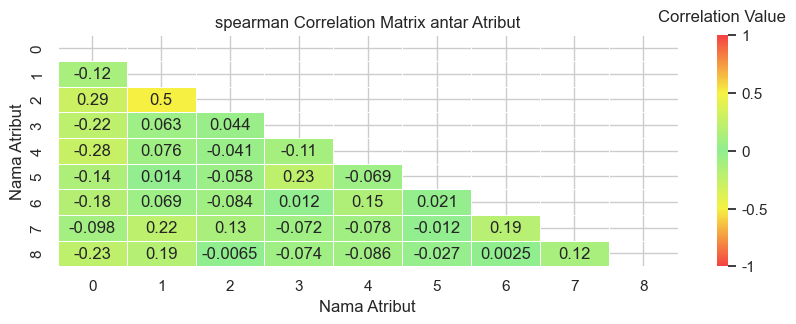

In [517]:
f_hubungan_atribut_numerik(df_6, 'spearman', horsize = 10, versize = 3)

Berdasarkan visual di atas, Proses reduksi dimensi menurunkan jumlah atribut dari 17 menjadi 9. Lalu, kondisi atribut-atribut pada data tidak memilki hubungan yang signifikan antar data. Maka dari itu, proses penanganan multikolinearitas atau hubungan antar atribut berhasil ditangani.

# **F. Model Definition**

Bagian ini bertujuan untuk Penentuan Hyperparameter Clustering menggunakan KMeans

## **1. Penentuan Hyperparameter berdasarkan Elbow Method**

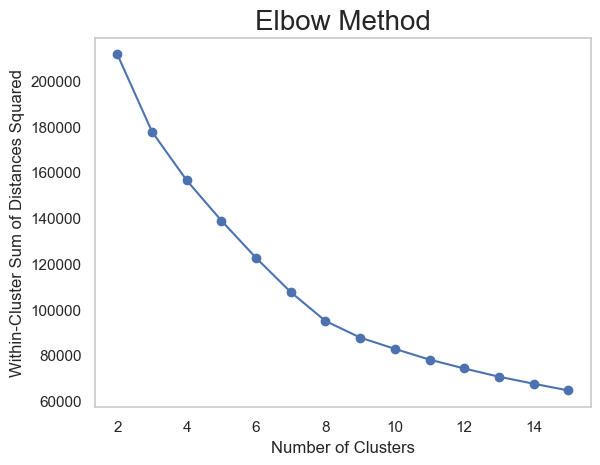

In [518]:
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(arr_6)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Distances Squared')
plt.show()

Berdasarkan informasi di atas,
* Semakin banyak jumlah cluster yang digunakan untuk proses clustering kmeans, nilai dari Within-Cluster Sum of Distances Squared atau nilai variansi terhadap poin centroid akan menurun. Bisa diartikan bahwa, semakin banyak jumlah clustering yang digunakan, maka jarak antara data di cluster yang sama akan berkurang dan data-data dalam satu clustering memiliki nilai yang makin mirip.
* Namun, perubahan nilai Within-Cluster Sum of Distances Squared setiap perubahan jumlah cluster berbeda-beda dimana perubahan yang signifikan terjadi pada jumlah cluster 2 hingga 8. Bisa diartikan bahwa jika jumlah cluster dinaikkan dari 7 menjadi 8, satu cluster yang berisikan kumpulan data dengan jarak antar data yang berjauhan, terbagi menjadi dua cluster. Lalu, dua cluster baru ini memiliki kondisi data dengan jarak antar data yang berdekatan.
* Ketika jumlah cluster dinaikkan dari 8, perubahan nilai Within-Cluster Sum of Distances Squared selalu konstan. Bisa diartikan bahwa jika jumlah cluster dinaikkan dari 8 menjadi 9, satu cluster yang berisikan kumpulan data yang berdekatan terbagi menjadi dua. Permasalahan dari kondisi ini adalah bisa saja jarak antar data (anggota) terluar dari dua cluster ini masih berdekatan. Artinya, bisa saja dua cluster ini tidak memiliki data-data dengan karakteristik antar-cluster yang berbeda secara signifikan dan tidak cocok untuk dibedakan menjadi dua cluster yang berbeda.
* Maka dari itu, jumlah cluster yang cocok adalah dari 3 hingga 8.

## **2. Penentuan Hyperparameter berdasarkan average silhouette_score**

In [519]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters = n_clusters,
                           init = 'k-means++',
                           max_iter = 300,
                           n_init = 10,
                           random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_

        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.6394923981955151
For n_clusters = 3 The average silhouette_score is : 0.544686129395231
For n_clusters = 4 The average silhouette_score is : 0.26014449574938997
For n_clusters = 5 The average silhouette_score is : 0.30008751769335956
For n_clusters = 6 The average silhouette_score is : 0.3018996588957136
For n_clusters = 7 The average silhouette_score is : 0.31874127744699865
For n_clusters = 8 The average silhouette_score is : 0.3269768118022506
For n_clusters = 9 The average silhouette_score is : 0.31857502964215506
For n_clusters = 10 The average silhouette_score is : 0.3234645567376057
For n_clusters = 11 The average silhouette_score is : 0.2951009298700602


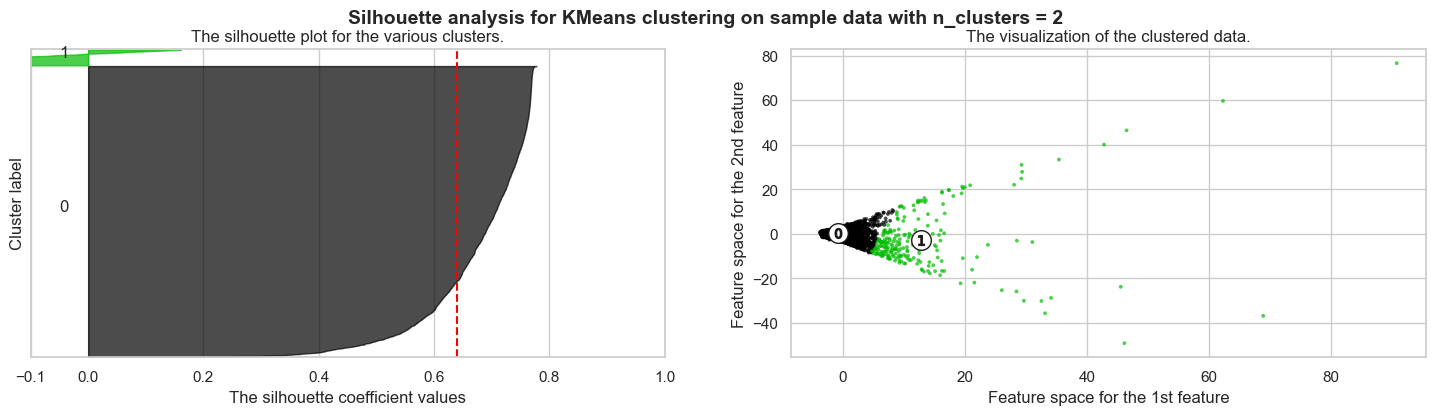

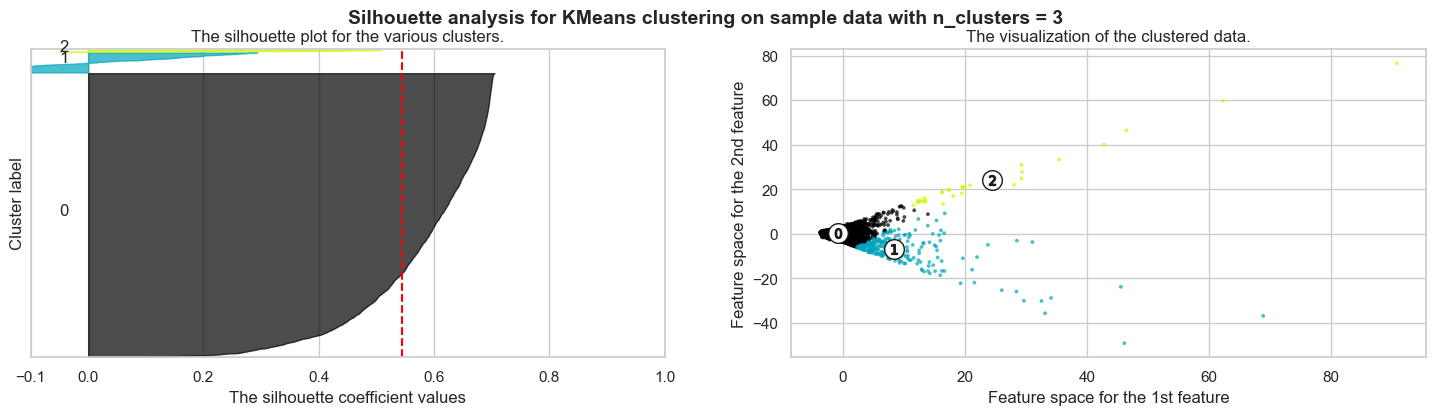

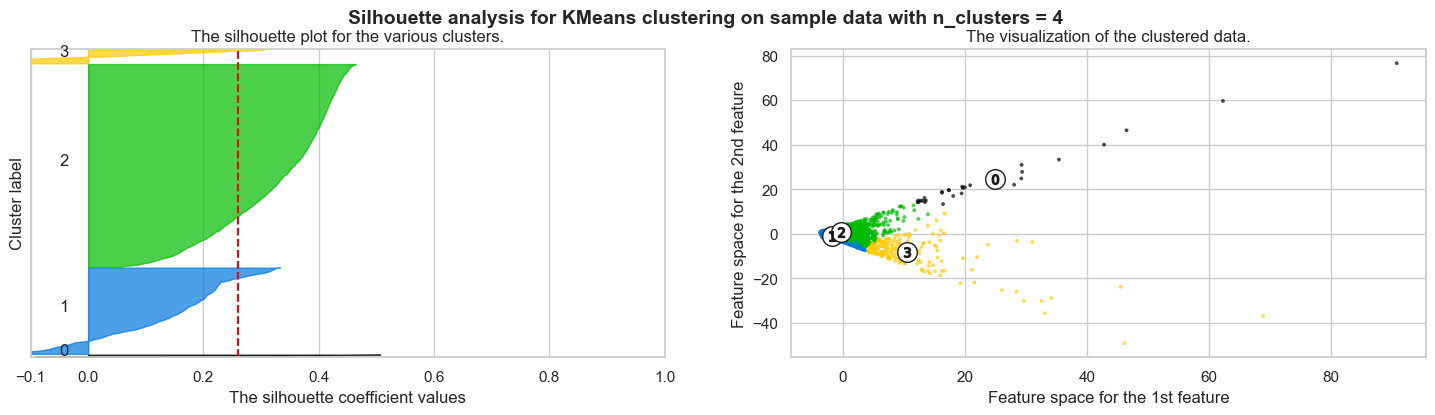

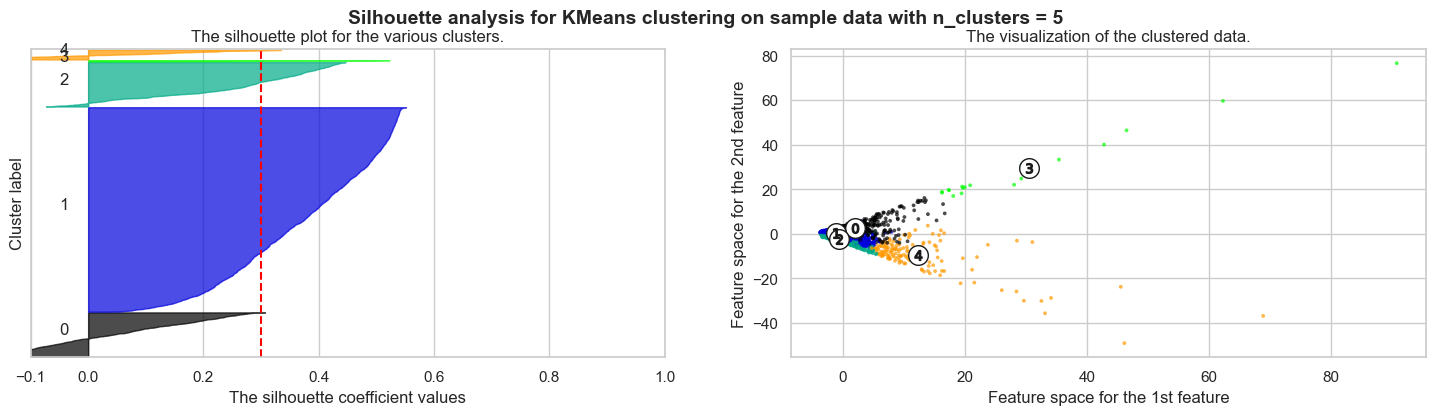

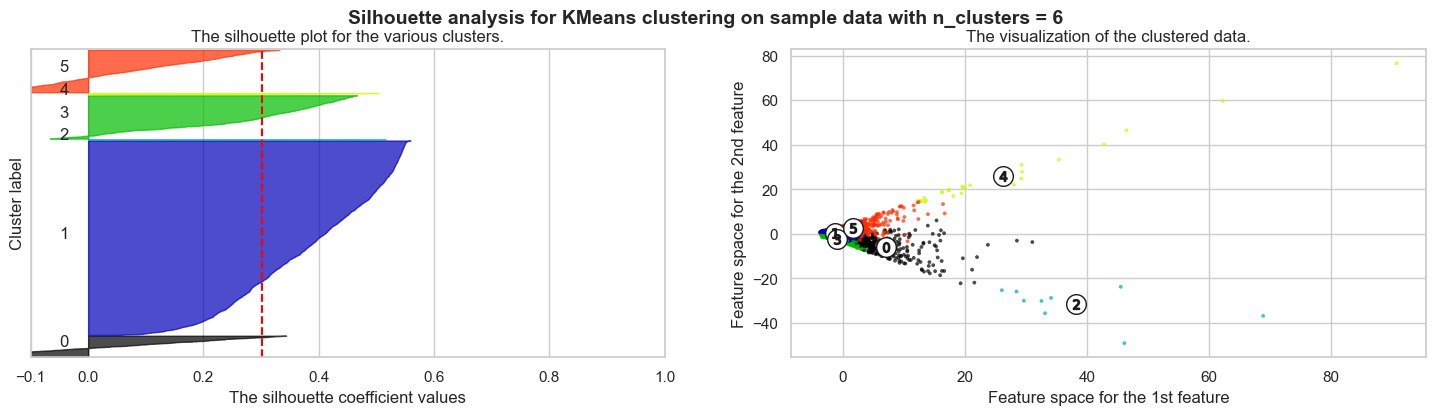

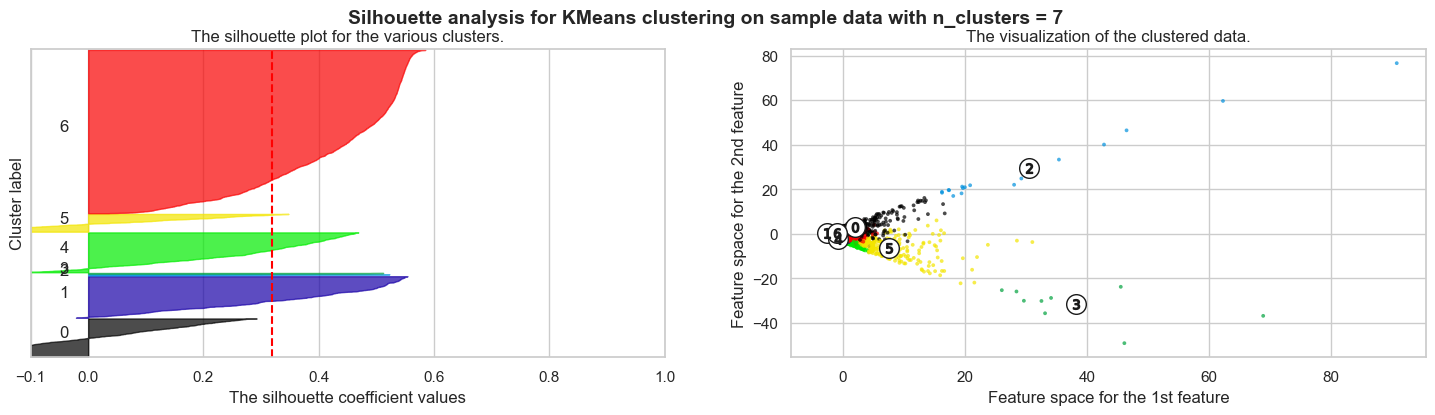

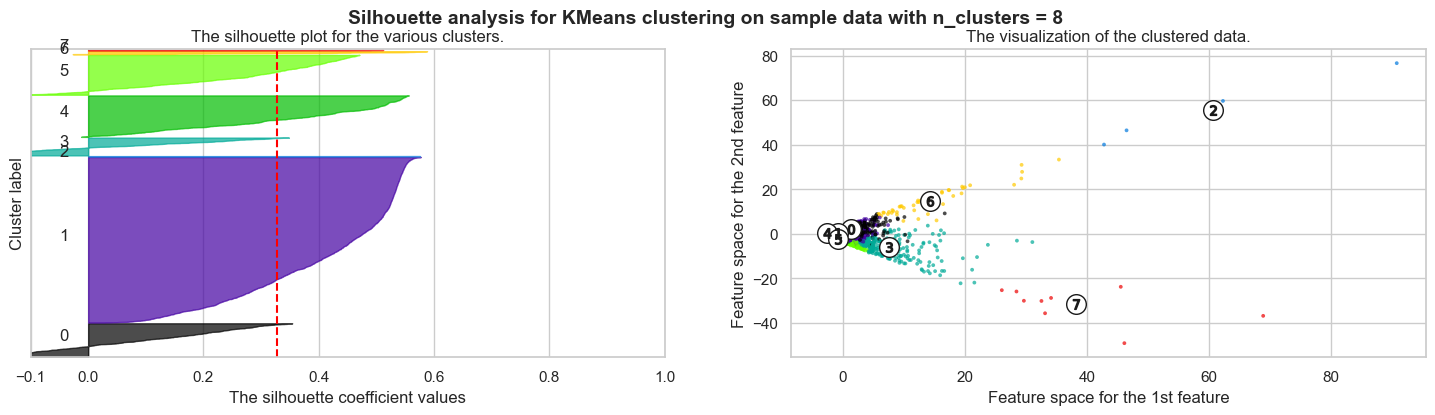

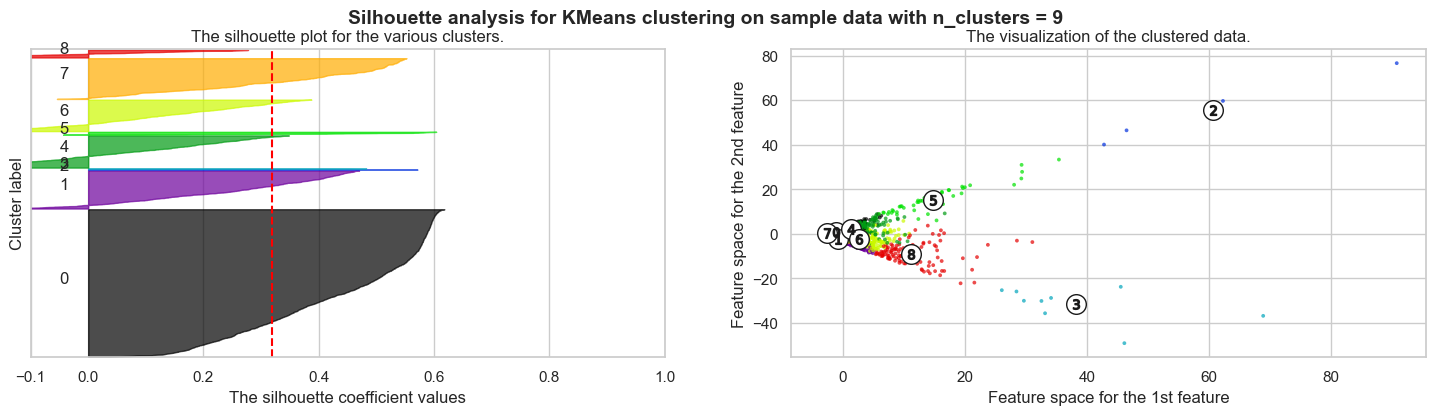

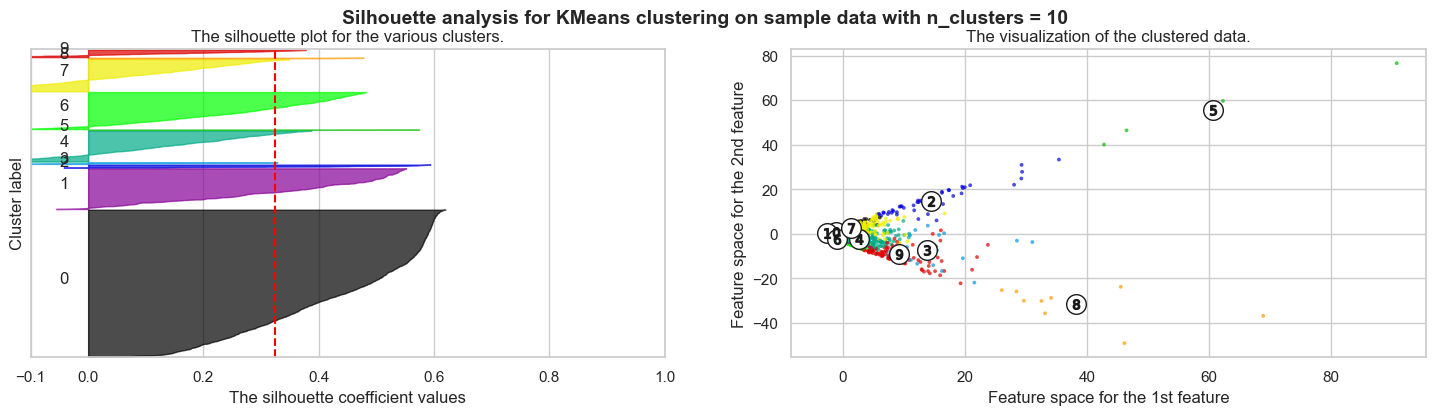

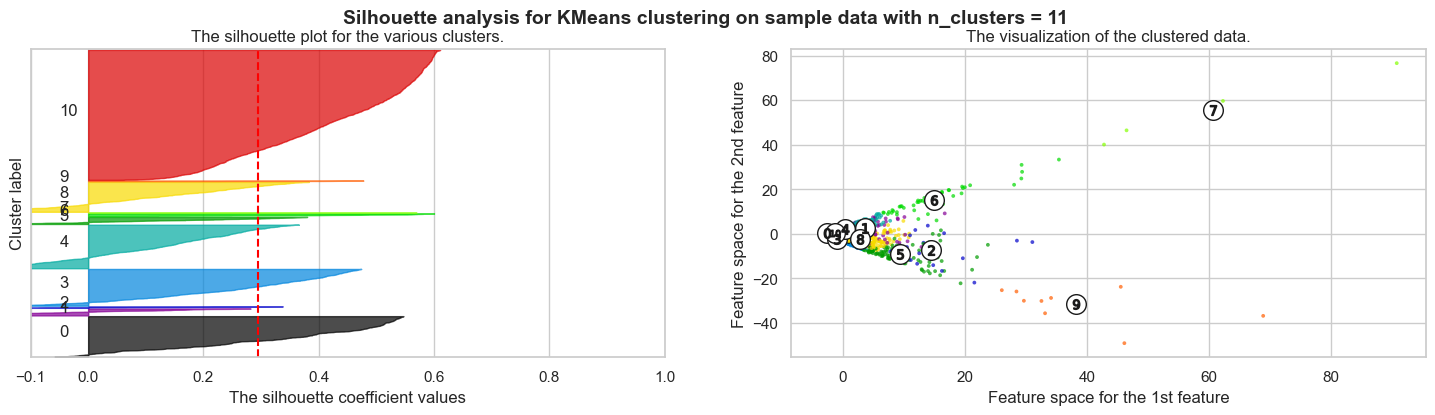

In [520]:
plot_silhouette(range(2, 12), arr_6, random_state)

Berdasarkan visual di atas,
* Nilai rata-rata dari silhouette_score semua cluster menurun ketika jumlah cluster yang digunakan bertambah. Artinya, data-data yang dimiliki dekat dengan centroid cluster sendiri daripada centroid cluster yang lain. Namun, kondisi ini tidak sesuai dengan visualisasi data ketika jumlah cluster yang digunakan bernilai 2 hingga 5. Terdapat beberapa kelompok yang memiliki data dengan nilai yang sangat berbeda dengan data lainnya (dalam satu cluster yang sama).
* Ketika jumlah cluster yang digunakan bernilai 8 hingga 11, terdapat beberapa cluster yang memiliki nilai silhoutte score yang lebih rendah daripada nilai rata-rata silhoutte score semua cluster. Artinya, cluster-cluster ini memiliki perbedaan jarak yang tidak signifikan dan bisa memiliki informasi yang sama.
* Lalu, ketika jumlah cluster yang digunakan bernilai 6, semua kelompok cluster memiliki nilai silhoutte score di atas rata-rata.
* Maka dari itu, hyperparameter kmeans clustering yang cocok digunakan adalah 6.

# **G. Model Training**

Bagian ini bertujuan untuk melakukan proses clustering dengan KMeans dengan n_clusters = 6

In [521]:
km = KMeans(n_clusters = 6,
            init = 'k-means++',
            max_iter = 300,
            n_init = 10,
            random_state = 10)
cluster_kmeans = km.fit_predict(arr_6)
cluster_kmeans

array([1, 1, 6, ..., 6, 6, 0])

In [522]:
# Insert clustering result into original dataset
df_7_kmeans = df_1.copy()
df_7_kmeans['cluster_kmeans'] = cluster_kmeans
df_7_kmeans

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_kmeans  
0        0.000000               NaN               0.0       8               1  
1        0.000000               NaN               0.0       8               1  
2     1494.480376       2638.598410               0.0       8               6  
3     3029.380326         85.428885               0.0       8               1  
4      215.316424        137.846006               0.0       8             

# **H. Model Evaluation**

Bagian ini bertujuan untuk menganalisis hasil clustering dengan KMeans dengan n_clusters = 7.

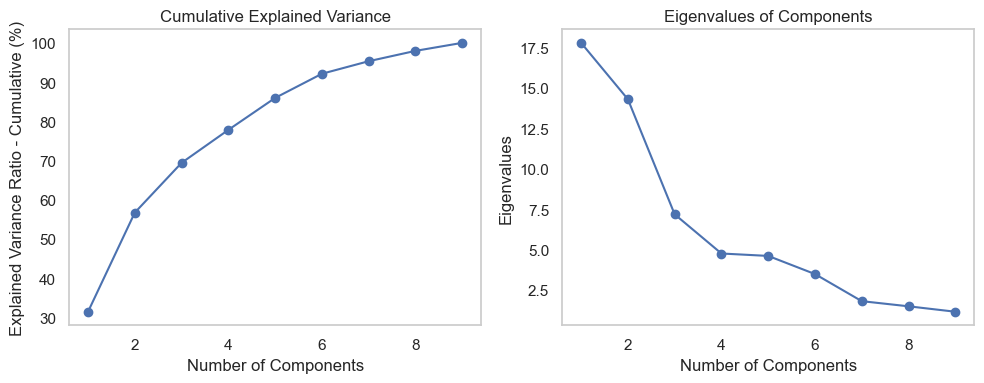

Berdasarkan model PCA yang telah dibuat, untuk mempertahankan 95.00% informasi pada data, jumlah atribut yang perlu digunakan adalah 7


In [549]:
f_pca_model_graph(arr_6, 0.95)

<Axes: >

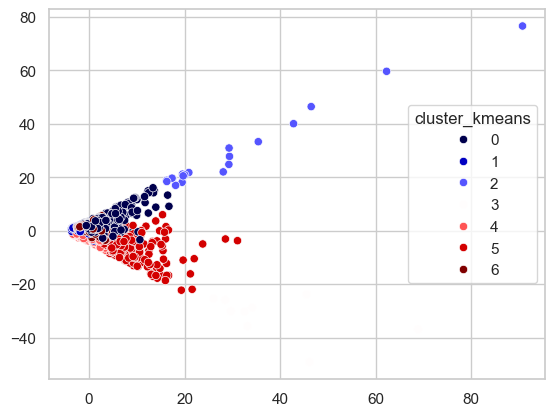

In [550]:
pca_2d = PCA(n_components=2)
pca_2d.fit(arr_6)

X_scaled_pca_2d = pca_2d.fit_transform(arr_6)

sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_7_kmeans['cluster_kmeans'], palette='seismic')

Berdasarkan informasi di atas, jika visualisasi clustering hanya berdasarkan visual hasil reduksi dimensi dengan dua componen (dimensi), dapat terjadi misinterpretasi karena proses PCA menghilangkan 60% data untuk dua componen. Maka dari itu, evaluasi cluster tidak menggunakan cara ini.

Untuk mengevaluasi pada satu cluster, contoh cluster nomor 0:
* Pertama memindahkan seluruh data yang berada di cluster nomor 0.
* Kedua, mempersiapkan grafik histogram yang dibuat berdasarkan keseluruhan data untuk semua nilai atribut.
* Lalu, tempatkan data-data dari cluster nomor 0 sebagai garis vertikal berwarna merah. Contoh, pada histogram keseluruhan data untuk atribut BALANCE, data-data dari cluster 0 ditempatkan pada histogram tersebut berdasarkan nilai atribut BALANCE dari data-data cluster 0. Jika terdapat banyak garis merah yang berada di sisi kiri histogram atribut BALANCE, maka dapat diasumsikan bahwa cluster 0 memiliki karakteristik unik pada atribut BALANCE dimana memiliki nilai atribut BALANCE yang rendah. Namun, jika terdapat banyak garis merah yang berada di seluruh sisi histogram, maka dapat diasumsikan bahwa cluster 0 tidak memiliki karakteristik unik pada atribut BALANCE.

### **a. Analisis Cluster Number 0**

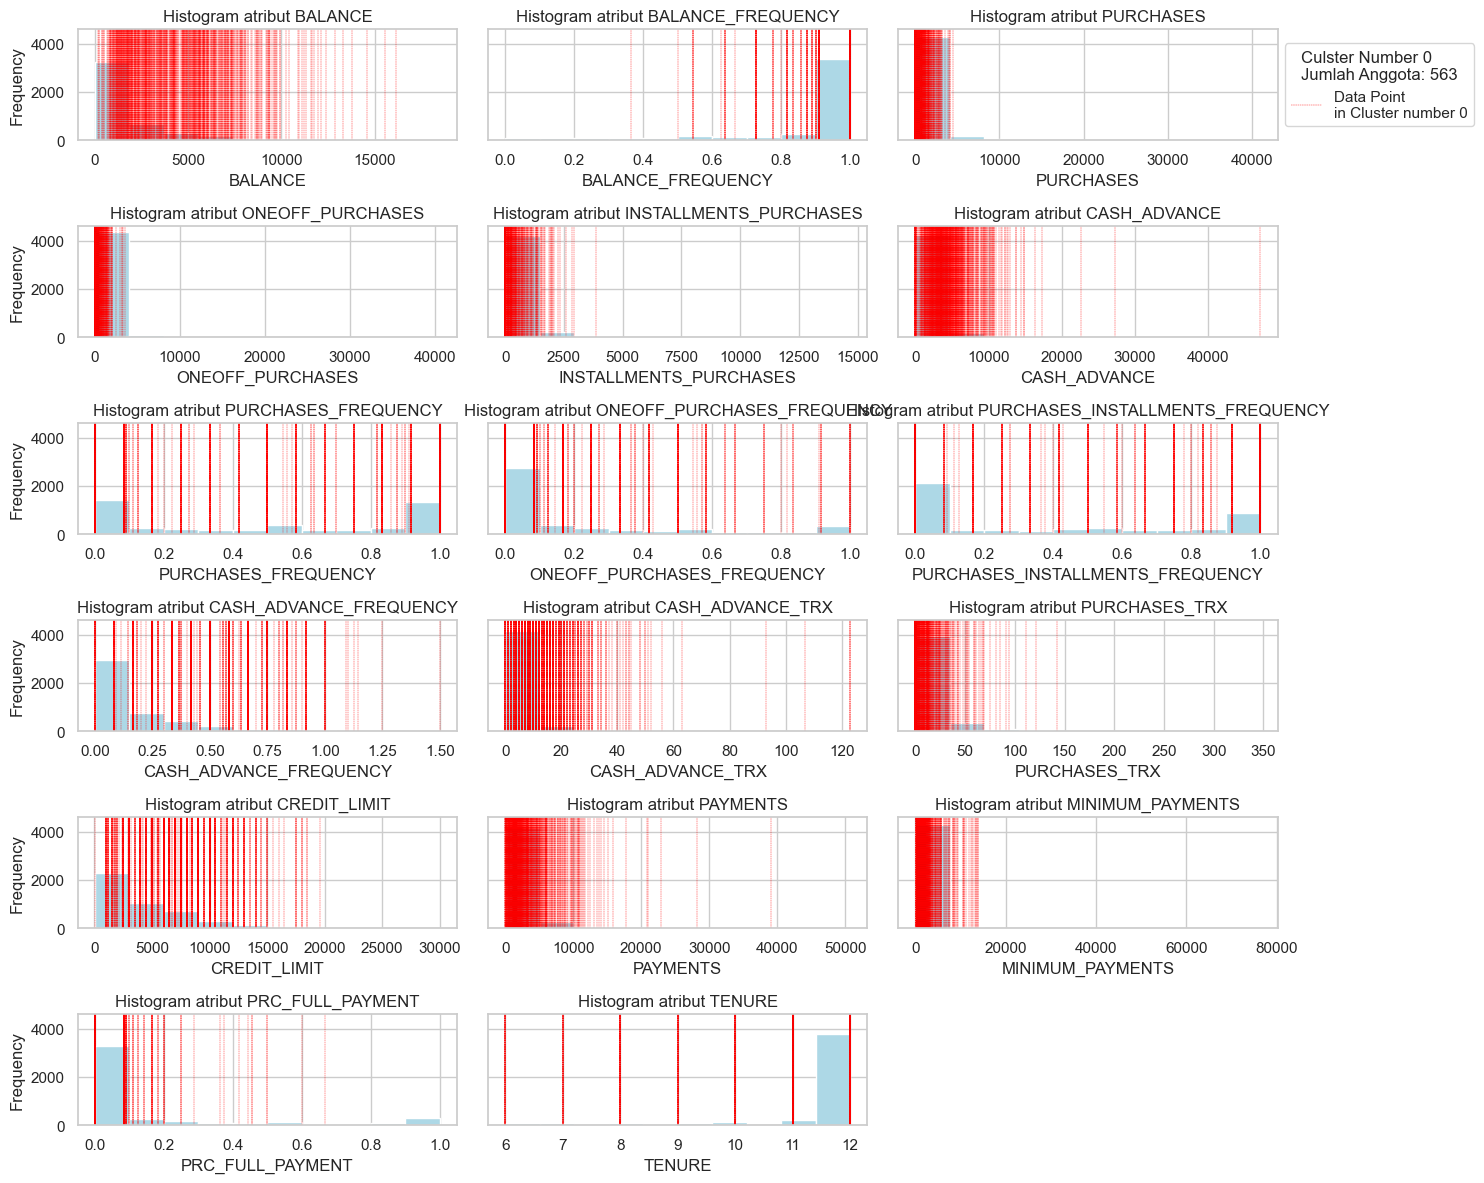

In [533]:
def f_persebaran_data_cluster_dengan_data_lain(aa, dataframe_keseluruhan, dataframe_cluster, data_id, title, fig_per_row = 3, hor_size = 15, ver_size = 10):
    df_temp = dataframe_keseluruhan.drop(columns=[i for i in dataframe_keseluruhan if dataframe_keseluruhan[i].dtype == 'O'])
    # Membuat dataframe yang berisi atribut numeric
    row = math.ceil(df_temp.shape[1]/fig_per_row)

    histogram = df_temp.hist(figsize=(hor_size, ver_size), bins=10, color='lightblue', sharey=True, layout=(row, fig_per_row))
    histogram = histogram.flatten()

    index = 0
    
    # Melakukan looping berdasarkan jumlah histogram
    for histogram_name, atribut in zip(histogram, df_temp.columns):
        histogram_name.set_title(f"Histogram atribut {atribut}") # Membuat judul histogram
        histogram_name.set_xlabel(atribut)  # Membuat label x-axis
        histogram_name.set_ylabel("Frequency") # Membuat label y-axis

        for color_id, country in enumerate(dataframe_cluster[data_id].unique()):
            nilai_atribut = dataframe_cluster[dataframe_cluster[data_id] == country][atribut].max()
            histogram_name.axvline(x=nilai_atribut, color='red', linestyle='--', linewidth=0.3, label=country)
        if index ==2:
            histogram_name.legend(labels=[f'Data Point\nin Cluster number {aa}'], title=title, loc='center left', bbox_to_anchor=(1, 0.5))
        index = index + 1
    

    for j in range(len(df_temp.columns), len(histogram)):
        histogram[j].set_visible(False)
    
    return histogram



df_temp = df_7_kmeans[df_7_kmeans['cluster_kmeans']==0]
histogram = f_persebaran_data_cluster_dengan_data_lain(0, df_3, df_temp, 'CUST_ID', f'Culster Number 0\nJumlah Anggota: {len(df_temp)}',
                                                       fig_per_row = 3, hor_size = 15, ver_size = 12)
plt.tight_layout()
plt.show()

* Berikut merupakan karakteristik dari cluster nomor 0 jika dibandingkan dengan data-data lainnya:
I have group of credit card customer where
    * Memiliki nilai PURCHASES yang rendah
    * Memiliki nilai ONEOFF_PURCHASES yang rendah

### **b. Analisis Cluster Number 1**

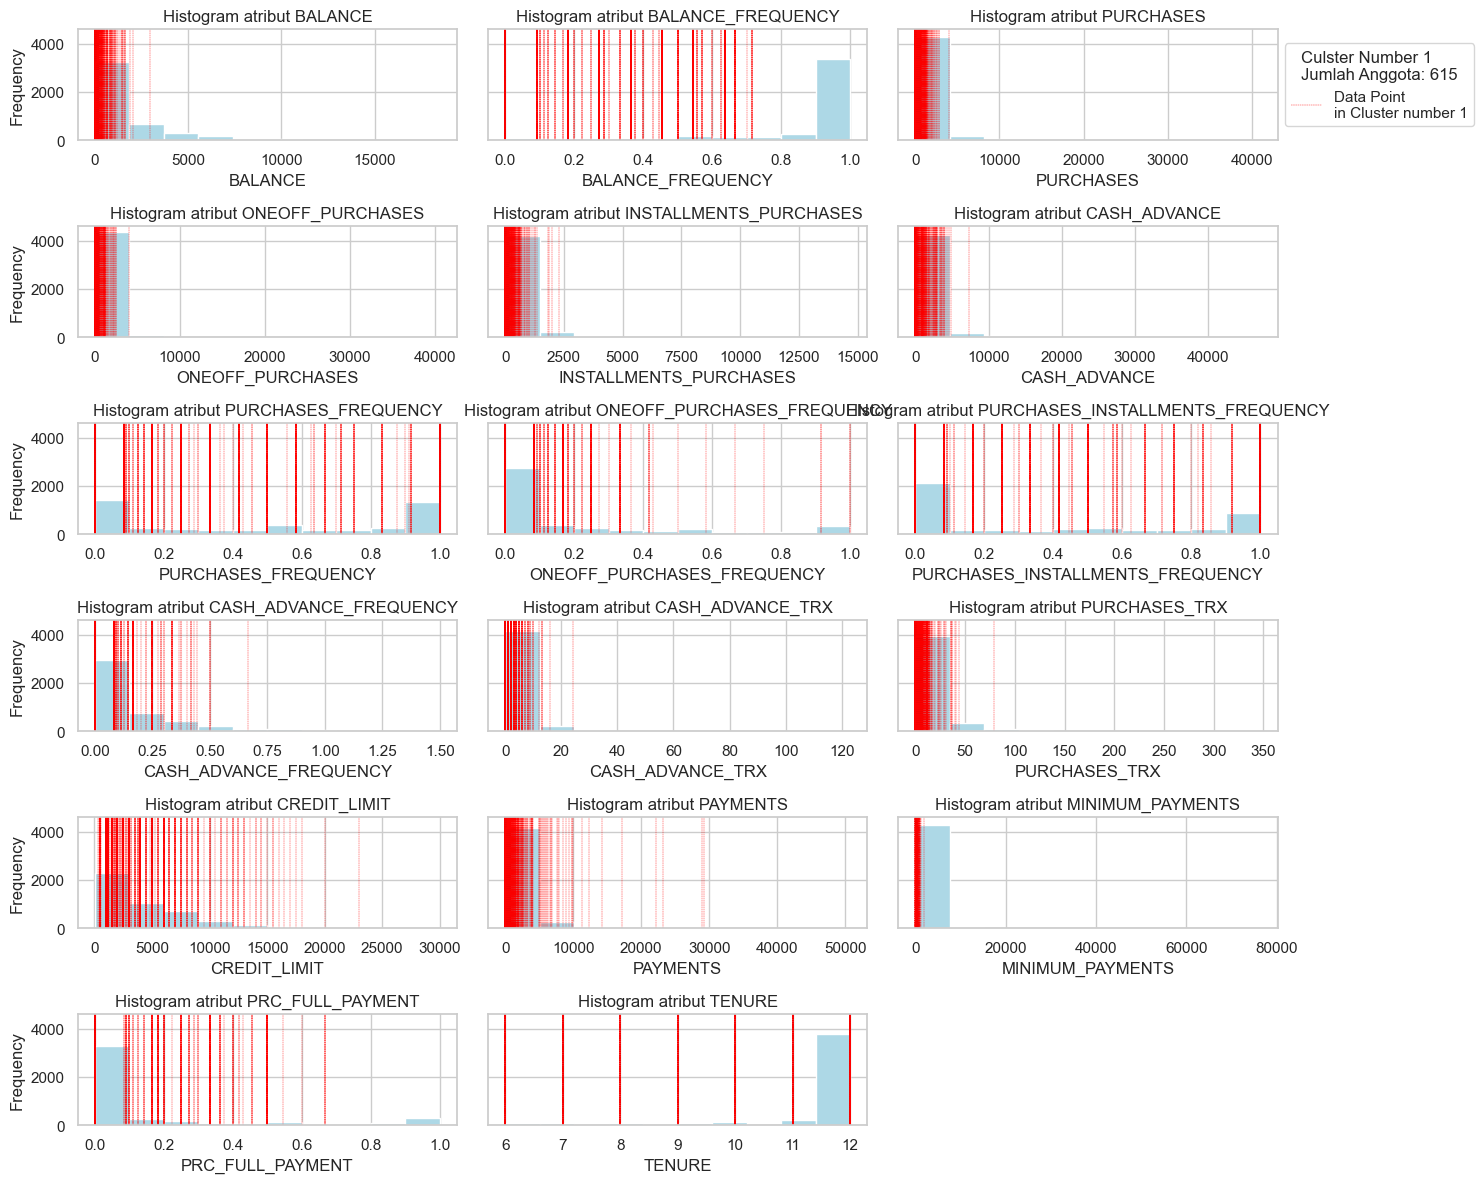

In [543]:
df_temp = df_7_kmeans[df_7_kmeans['cluster_kmeans']==1]
histogram = f_persebaran_data_cluster_dengan_data_lain(1, df_3, df_temp, 'CUST_ID', f'Culster Number 1\nJumlah Anggota: {len(df_temp)}',
                                                       fig_per_row = 3, hor_size = 15, ver_size = 12)
plt.tight_layout()
plt.show()

* Berikut merupakan karakteristik dari cluster nomor 1 jika dibandingkan dengan data-data lainnya:
I have group of creadit card customer where
    * Memiliki nilai BALANCE yang rendah 
    * Memiliki nilai BALANCE_FREQUENCY yang rendah
    * Memiliki nilai PURCHASES yang rendah
    * Memiliki nilai ONEOFF_PURCHASES yang rendah
    * Memiliki nilai CASH_ADVANCE yang rendah
    * Memiliki nilai CASH_ADVANCE_TRX yang rendah
    * Memiliki nilai PURCHASES_TRX yang rendah
    * Memiliki nilai MINIMUM_PAYMENTS yang rendah

### **c. Analisis Cluster Number 2**

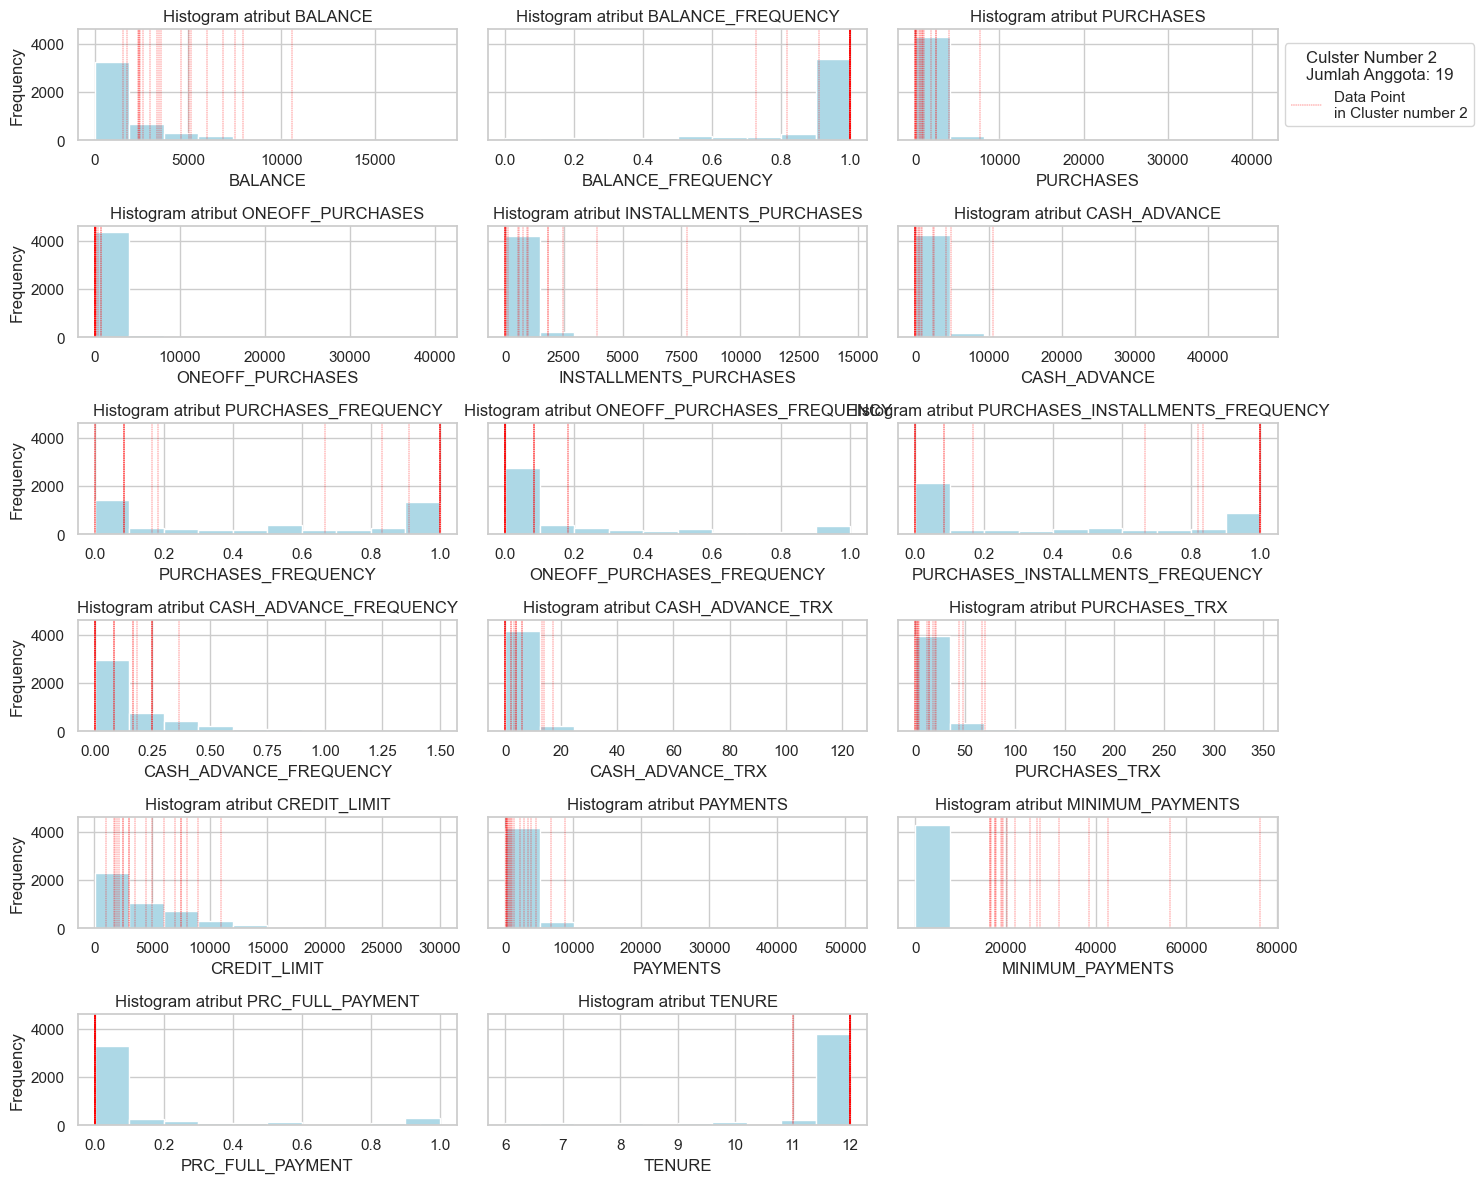

In [542]:
df_temp = df_7_kmeans[df_7_kmeans['cluster_kmeans']==2]
histogram = f_persebaran_data_cluster_dengan_data_lain(2, df_3, df_temp, 'CUST_ID', f'Culster Number 2\nJumlah Anggota: {len(df_temp)}',
                                                       fig_per_row = 3, hor_size = 15, ver_size = 12)
plt.tight_layout()
plt.show()

* Berikut merupakan karakteristik dari cluster nomor 2 jika dibandingkan dengan data-data lainnya:
I have group of customer credit card where
    * Memiliki nilai BALANCE_FREQUENCY yang tinggi
    * Memiliki nilai PURCHASES yang rendah
    * Memiliki nilai ONEOFF_PURCHASES yang rendah
    * Memiliki nilai MINIMUM_PAYMENTS yang tinggi
    * Memiliki nilai PRC_FULL_PAYMENT yang rendah
    * Memiliki nilai TENURE yang tinggi

### **d. Analisis Cluster Number 3**

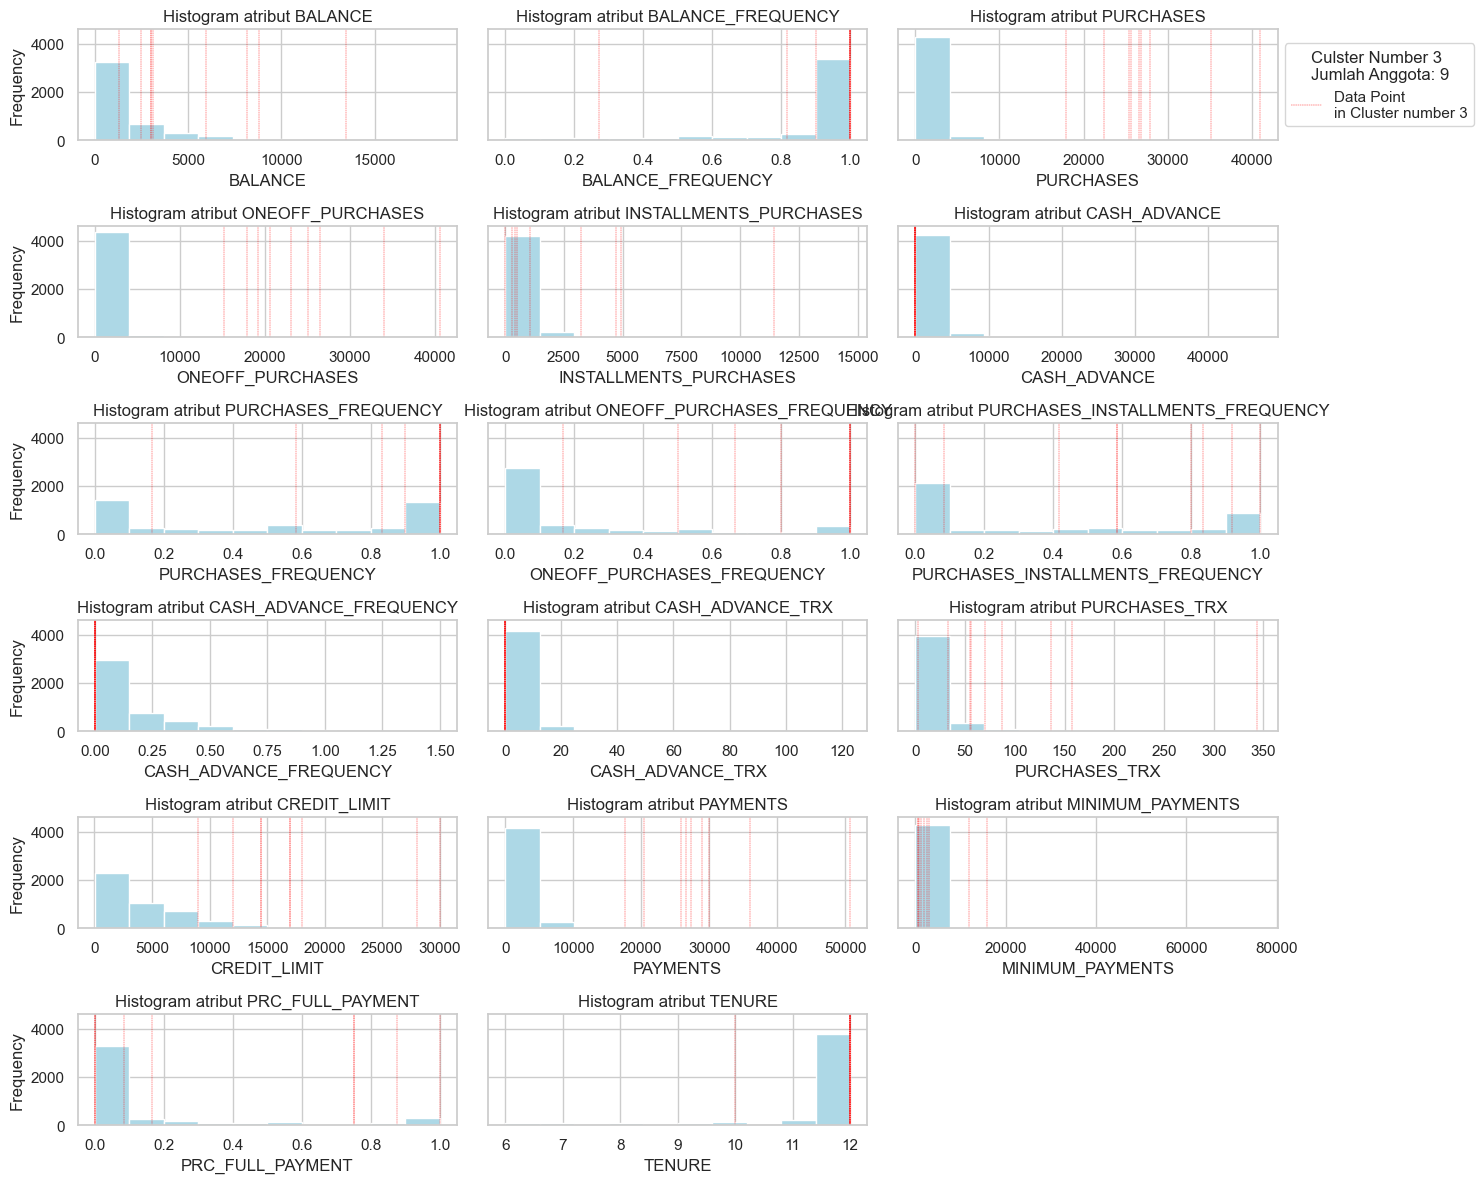

In [541]:
df_temp = df_7_kmeans[df_7_kmeans['cluster_kmeans']==3]
histogram = f_persebaran_data_cluster_dengan_data_lain(3, df_3, df_temp, 'CUST_ID', f'Culster Number 3\nJumlah Anggota: {len(df_temp)}',
                                                       fig_per_row = 3, hor_size = 15, ver_size = 12)
plt.tight_layout()
plt.show()

* Berikut merupakan karakteristik dari cluster nomor 3 jika dibandingkan dengan data-data lainnya:
    * Memiliki nilai CASH_ADVANCE yang rendah
    * Memiliki nilai CASH_ADVANCE_FREQUENCY yang rendah
    * Memiliki nilai CASH_ADVANCE_TRX yang rendah
    * Memiliki nilai TENURE yang tinggi

### **e. Analisis Cluster Number 4**

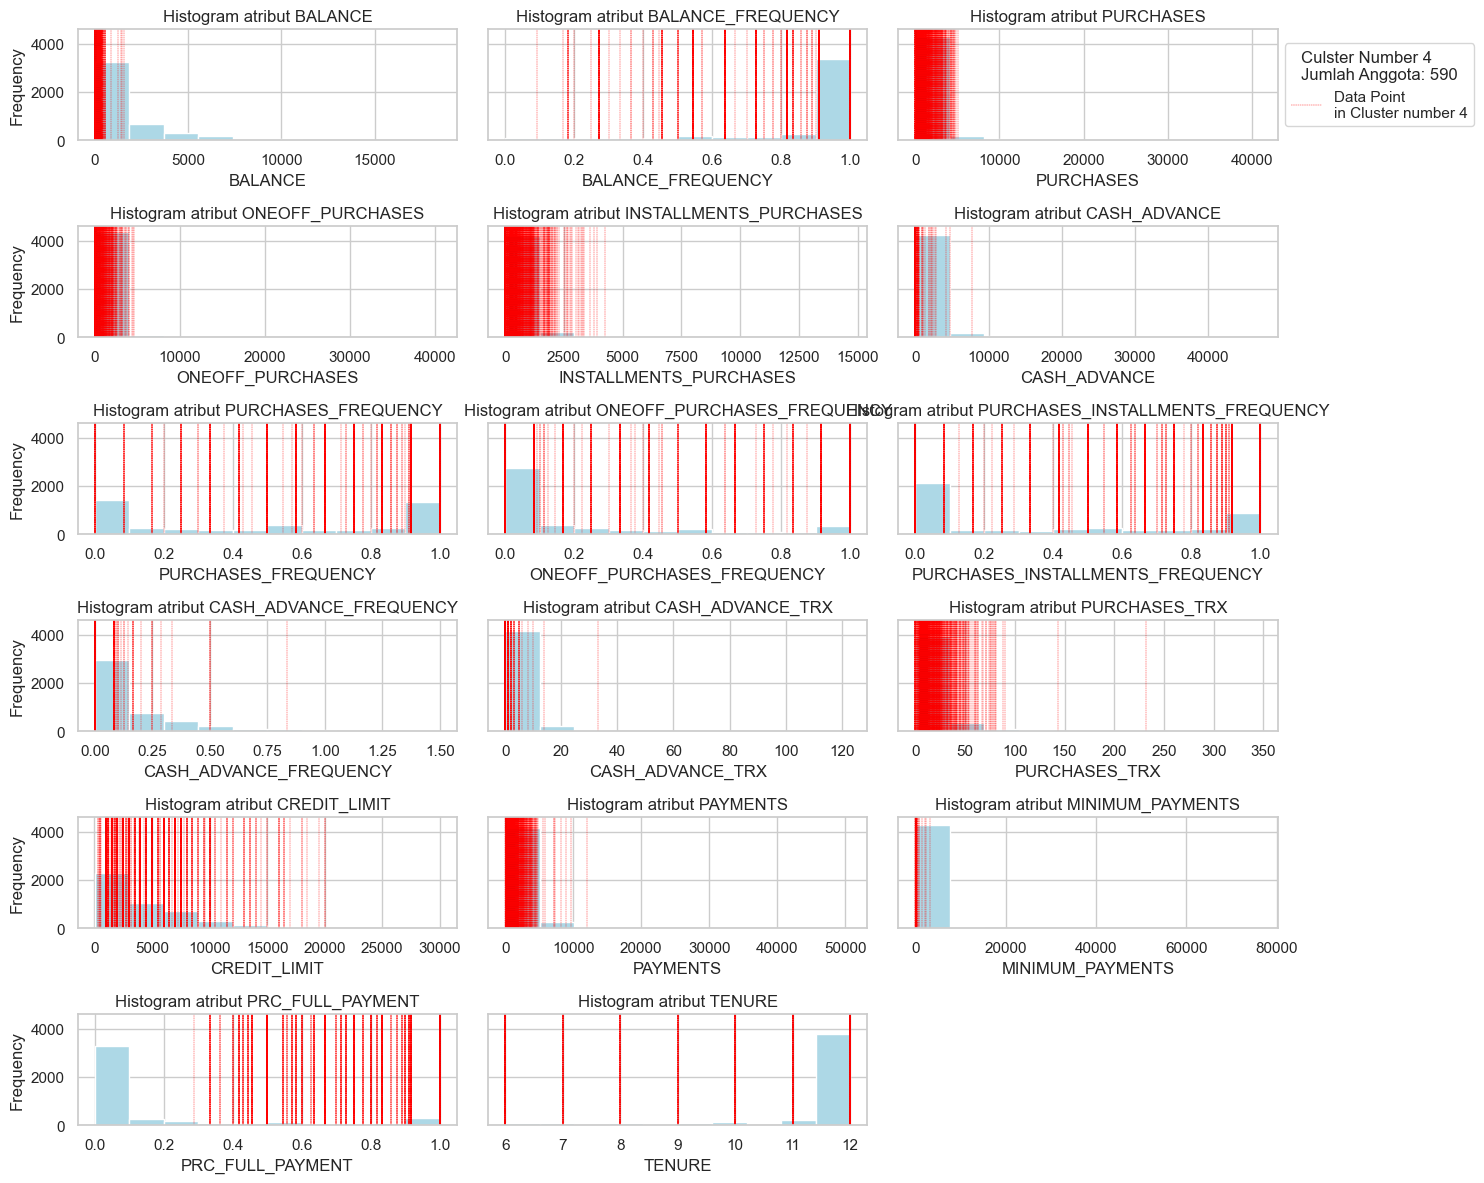

In [545]:
df_temp = df_7_kmeans[df_7_kmeans['cluster_kmeans']==4]
histogram = f_persebaran_data_cluster_dengan_data_lain(4, df_3, df_temp, 'CUST_ID', f'Culster Number 4\nJumlah Anggota: {len(df_temp)}',
                                                       fig_per_row = 3, hor_size = 15, ver_size = 12)
plt.tight_layout()
plt.show()

* Berikut merupakan karakteristik dari cluster nomor 4 jika dibandingkan dengan data-data lainnya:
i have group of customer credit card where
    * Memiliki nilai BALANCE yang rendah
    * Memiliki nilai PURCHASES yang rendah
    * Memiliki nilai ONEOFF_PURCHASES yang rendah
    * Memiliki nilai CASH_ADVANCE yang rendah
    * Memiliki nilai CASH_ADVANCE_TRX yang rendah
    * Memiliki nilai MINIMUM_PAYMENTS yang rendah
    * Memiliki nilai PRC_FULL_PAYMENT yang tinggi

### **f. Analisis Cluster Number 5**

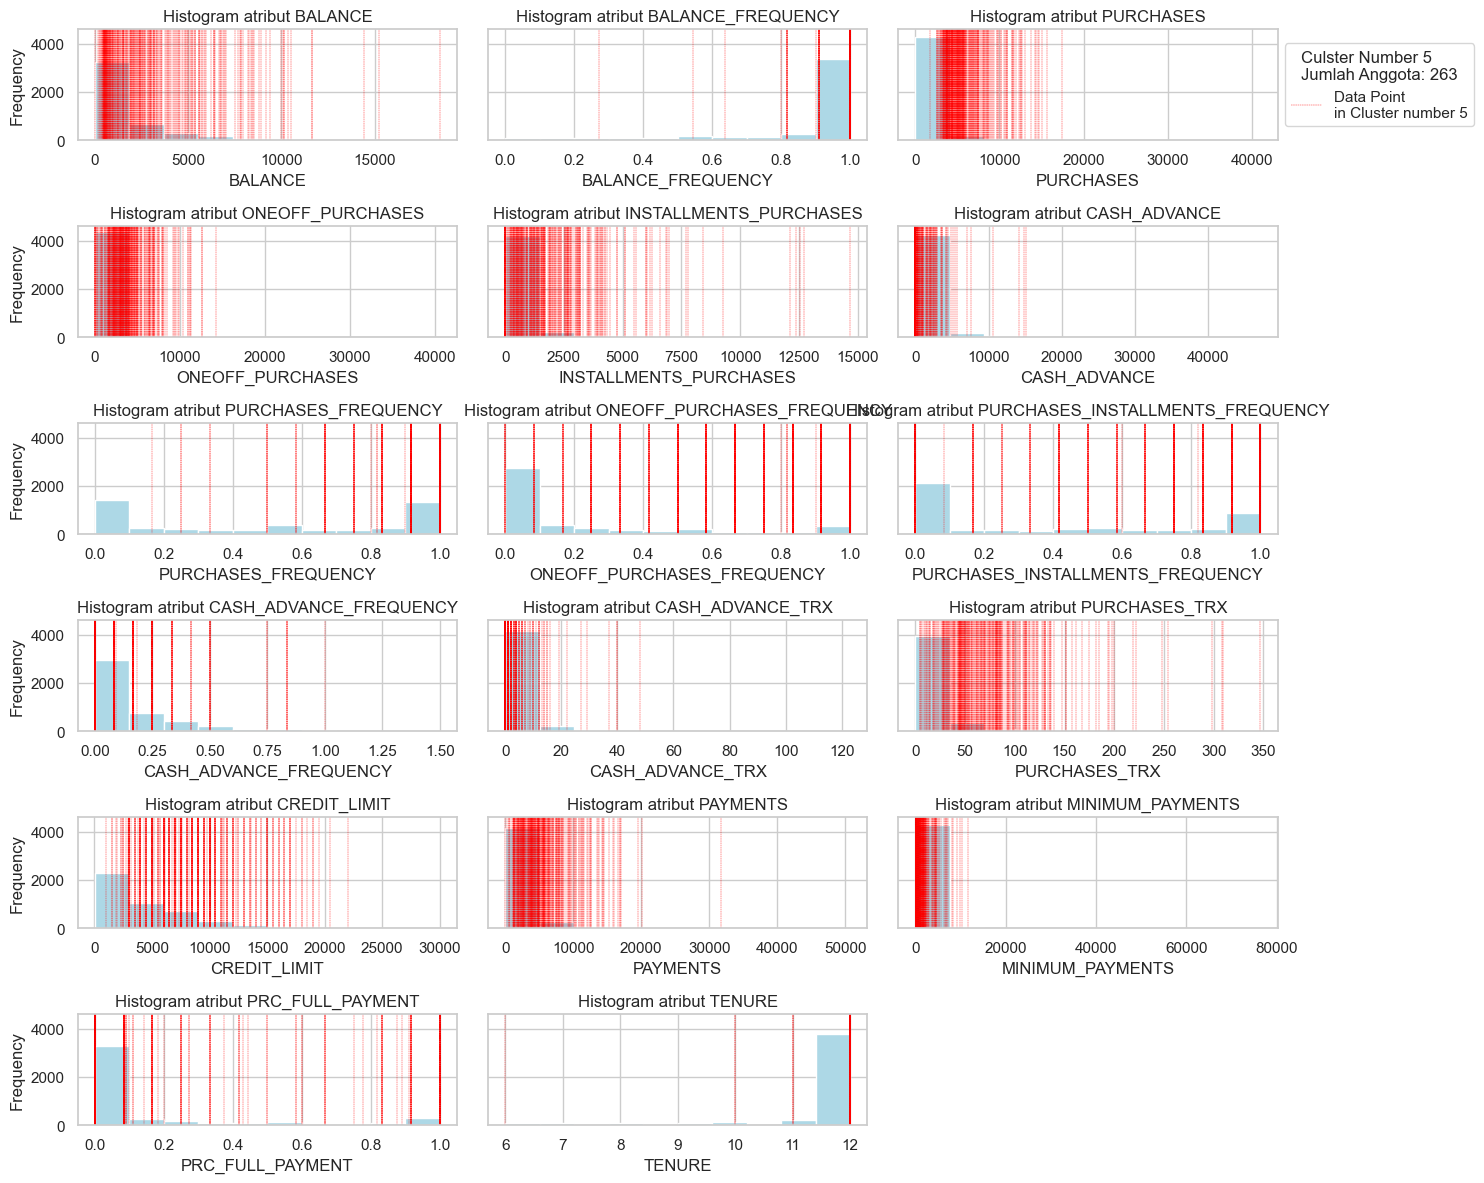

In [546]:
df_temp = df_7_kmeans[df_7_kmeans['cluster_kmeans']==5]
histogram = f_persebaran_data_cluster_dengan_data_lain(5, df_3, df_temp, 'CUST_ID', f'Culster Number 5\nJumlah Anggota: {len(df_temp)}',
                                                       fig_per_row = 3, hor_size = 15, ver_size = 12)
plt.tight_layout()
plt.show()

* Berikut merupakan karakteristik dari cluster nomor 5 jika dibandingkan dengan data-data lainnya:
    * Tidak memiliki nilai PURCHASES_FREQUENCY yang tinggi

# **I. Model Saving**

In [530]:
#Save Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump([i for i in df_7_kmeans.columns], file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(km, file_4)

# **J. Model Inference**

In [553]:
f_min_max_numerik(df_7_kmeans)

nama_kolom        min          max
0                           CUST_ID   1.000000   8949.00000
0                           BALANCE   0.000000  18495.55855
0                 BALANCE_FREQUENCY   0.000000      1.00000
0                         PURCHASES   0.000000  41050.40000
0                  ONEOFF_PURCHASES   0.000000  40624.06000
0            INSTALLMENTS_PURCHASES   0.000000  14686.10000
0                      CASH_ADVANCE   0.000000  47137.21176
0               PURCHASES_FREQUENCY   0.000000      1.00000
0        ONEOFF_PURCHASES_FREQUENCY   0.000000      1.00000
0  PURCHASES_INSTALLMENTS_FREQUENCY   0.000000      1.00000
0            CASH_ADVANCE_FREQUENCY   0.000000      1.50000
0                  CASH_ADVANCE_TRX   0.000000    123.00000
0                     PURCHASES_TRX   0.000000    347.00000
0                      CREDIT_LIMIT  50.000000  30000.00000
0                          PAYMENTS   0.000000  50721.48336
0                  MINIMUM_PAYMENTS   0.019163  76406.20752
0                  PRC_FULL_PAYMENT   0.000000      1.00000
0                            TENURE   6.000000     12.00000
0                    cluster_kmeans   0.000000      6.00000

In [554]:
# Create an instance

data_inf = {
    'BALANCE': 8000,
    'BALANCE_FREQUENCY': 0.8,
    'PURCHASES': 8000,
    'ONEOFF_PURCHASES': 8000,
    'INSTALLMENTS_PURCHASES': 8000,
    'CASH_ADVANCE': 8000,
    'PURCHASES_FREQUENCY': 0.8,
    'ONEOFF_PURCHASES_FREQUENCY': 0.8,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.8,
    'CASH_ADVANCE_FREQUENCY': 1,
    'CASH_ADVANCE_TRX': 100,
    'PURCHASES_TRX': 18,
    'CREDIT_LIMIT': 3000,
    'PAYMENTS': 9,
    'MINIMUM_PAYMENTS': 555,
    'PRC_FULL_PAYMENT': 0.9,
    'TENURE': 8}

data_inf = pd.DataFrame([data_inf])
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     8000                0.8       8000              8000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    8000          8000                  0.8   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.8                               0.8   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       1               100             18          3000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0         9               555               0.9       8

In [557]:
## Feature Scaling
data_inf_scaled = scaler.transform(data_inf)

## Dimensionality reduction using PCA
data_inf_scaled_pca = pca.transform(data_inf_scaled)

predictions = km.predict(data_inf_scaled_pca)
predictions

array([5])

# **K. Pengambilan Kesimpulan**

Bagian ini bertujuan untuk menarik beberapa kesimpulan berdasarkan hasil clustering.

## **1. Interpretasi dan Rekomendasi hasil Clustering**

Bagian ini bertujuan untuk menginterpretasikan karakteristik-karakteristik unik yang dimiliki oleh 7 cluster yang dibuat oleh model clustering.

### **a. Interpretasi cluster nomor 0**

* Interpretasi: Cluster ini memiliki customer yang jarang melakukan pembelanjaan. Diasumsikan bahwa mereka sedang berhemat, baik untuk pembelian kecil atau sesekali
* Rekomendasi: Hal yang bisa dilakukan untuk customer ini adalah dengan memberikan pembelajaran penggunaan kartu kredit untuk pihak awam. Lalu mereka juga perlu diajari kemudahan-kemudahan dari penggunaan kartu kredit dibandingkan uang kertas. Diasumsikan mereka dapat membuat kebiasaan baru untuk menggunakan kartu kredit.

### **b. Interpretasi cluster nomor 1**

* Interpretasi: Cluster ini memiliki customer yang jarang menggunakan kartu kredit untuk keperluan sehari-hari ataupun untuk keperluan khusus. Mereka juga tidak memiliki nilai kredit yang kecil. Diasumsikan kondisi ini terjadi karena mereka tidak terlalu memikirkan apa yang mereka bisa gunakan dari kartu kredit atau mereka tidak tahu sama sekali.
* Rekomendasi: Hal yang bisa dilakukan untuk customer ini dengan melakukan hal yang sama pada poin sebelumnya, memberikan pembelajaran penggunaan kartu kredit untuk pihak awam. Lalu mereka juga perlu diajari kemudahan-kemudahan dari penggunaan kartu kredit dibandingkan uang kertas.

### **c. Interpretasi cluster nomor 2**

* Interpretasi: Cluster ini memiliki customer yang jarang beraktivitas menggunakan kartu kredit walau mereka memiliki nilai saldo yang tinggi. 
* Rekomendasi: Cluster ini tidak bisa diberikan rekomendasi karena jumlah data pada cluster hanya 19 data.

### **d. Interpretasi cluster nomor 3**

* Interpretasi: Cluster ini memiliki customer jangka panjang yang jarang menggunakan fitur penarikan tunai.
* Rekomendasi: Cluster ini tidak bisa diberikan rekomendasi karena jumlah data pada cluster hanya 9 data.

### **e. Interpretasi cluster nomor 4**

* Interpretasi: Cluster ini memiliki pengguna kartu kredit dengan aktivitas rendah dan bertanggung jawab secara finansial.
* Rekomendasi: Berdasarkan sifat customer yang memiliki sifat tanggung jawab yang tinggi, perusahaan dapat menawarkan insentif seperti hadiah uang kembali untuk mendorong lebih seringnya penggunaan kartu mereka untuk pembelian sehari-hari.


### **f. Interpretasi cluster nomor 5**

* Interpretasi: Diasumsikan bahwa cluster ini terdiri dari pengguna dengan aktivitas rendah dimana mereka lebih memilih metode pembayaran lain (seperti kartu debit, uang tunai, atau dompet digital). Mereka tidak memanfaatkan kartu kredit mereka untuk transaksi yang bisa dilakukan sehari-hari.

* Rekomendasi: Melakukan penawaran berhadiah cashback atau poin yang nantinya bisa ditukerkan dengan hadiah lain.

## **2. KELEBIHAN dan KELEMAHAN dari model**

* Kelebihan:

Salah satu kelebihan dari model k-means adalah betuk model yang relatif simpel sehingga waktu pemodelannya yang sangat cepat.

* Kelemahan:

Terdapat beberapa kelemahan yang dimiliki oleh model clustering K-Means. Pada dasarnya model K-Means sensitif terhadap nilai outlier dimana saja data dengan karakteristik yang berbeda dikelompokkan ke cluster yang sama. Hal ini dapat dilihat dari hasil clustering dimana 2 dari 6 cluster yang dibuat, memiliki jumlah data yang kecil. Kemudian, terdapat pula beberapa cluster yang masih memiliki karakteristik yang sama dengan cluster lain.

## **3. Rekomendasi peningkatan kualitas pemodelan**

Salah satu solusi yang bisa dilakukan untuk meningkatkan hasil pemodelan clustering adalah dengan menggunakan model yang lebihs sesuai dengan kondisi data, yaitu model clustering DBmeans. Model ini tidak bersifat sensitif outlier.

## **4. Pembahasan hasil clustering berdasarkan keperluan bisnis**

Berdasarkan hasil yang didapat, model clustering k-means tidak cocok digunakan untuk penentuan segmentasi customer kartu kredit. Hal ini dikarenakan data yang berhubungan dengan uang memiliki nilai outlier yang bervariasi. Namun, dikarenakan data ini juga bersifat sensitif, data outlier ini tidak bisa ditangani. Hasilnya adalah terdapat cluster yang memiliki informasi customer yang hampir sama (cluster nomor 0 dan 1) lalu sedikitnya jumlah customer dalam satu kelompok (cluster nomor 2 dan 3)